# 1. Import Libraries and Dataset

In [1]:
import pandas as pd
from datetime import date, timedelta
pd.set_option('display.max_columns', 500)
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('ufc_scrape/data_fighters2.csv')

In [3]:
df.head()

,name,record,height,weight,reach,stance,dob,event_name,f1_name_a,f1_name_span,f2_name_a,f2_name_span,weightclass,rounds,time,f1_result,f2_result,f1_kd,f2_kd,f1_sig_str,f2_sig_str,f1_sig_str_perc,f2_sig_str_perc,f1_tot_str,f2_tot_str,f1_td,f2_td,f1_td_perc,f2_td_perc,f1_sub_att,f2_sub_att,f1_pass,f2_pass,f1_rev,f2_rev,f1_sig_str_head,f2_sig_str_head,f1_sig_str_body,f2_sig_str_body,f1_sig_str_leg,f2_sig_str_leg,f1_sig_str_dist,f2_sig_str_dist,f1_sig_str_clinch,f2_sig_str_clinch,f1_sig_str_ground,f2_sig_str_ground
0,\n Tom Aaron\n\n,\n Record: 5-3-0\n,\n --\n,\n 155 lbs.\n,\n --\n,\n \n,"\n \n Jul 13, 1978\n \n",\n\n Strikeforce - Heavy Artillery\n\n,Tom Aaron,NaN,NaN,Eric Steenberg,\n \n Catch Weight Bout\n,"\n ,\n 1\n","\n ,\n \n 0:56\n\n",\n W\n,\n L\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,\n Hunter Azure\n\n,\n Record: 8-0-0\n,"\n 5' 8""\n",\n 135 lbs.\n,"\n 69""\n",\n Orthodox\n,"\n \n Mar 02, 1992\n \n",\n\n UFC Fight Night: Cowboy vs. Gaethje\n\n,Brad Katona,NaN,Hunter Azure,NaN,\n \n Bantamweight Bout\n,"\n ,\n 3\n","\n ,\n \n 5:00\n\n",\n L\n,\n W\n,0.0,0.0,\n 21 of 60\n,\n 41 of 118\n,\n 35%\n,\n 34%\n,\n 40 of 83\n,\n 55 of 133\n,\n 3 of 12\n,\n 0 of 1\n,\n 25%\n,\n 0%\n,0.0,0.0,1.0,1.0,0.0,1.0,\n 18 of 51\n,\n 25 of 91\n,\n 2 of 7\n,\n 11 of 20\n,\n 1 of 2\n,\n 5 of 7\n,\n 17 of 54\n,\n 33 of 105\n,\n 4 of 6\n,\n 6 of 8\n,\n 0 of 0\n,\n 2 of 5\n
2,\n Michael Byrnes\n\n,\n Record: 5-2-0\n,"\n 5' 11""\n",\n 155 lbs.\n,\n --\n,\n \n,"\n \n Jul 17, 1990\n \n",\n\n Strikeforce - Miami\n\n,NaN,Michael Byrnes,NaN,Dave Zitanick,\n \n Welterweight Bout\n,"\n ,\n 3\n","\n ,\n \n 5:00\n\n",\n W\n,\n L\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,\n Tom Aaron\n\n,\n Record: 5-3-0\n,\n --\n,\n 155 lbs.\n,\n --\n,\n \n,"\n \n Jul 13, 1978\n \n",\n\n Strikeforce - Henderson vs. Babalu\n\n,Tom Aaron,NaN,NaN,Matt Ricehouse,\n \n Lightweight Bout\n,"\n ,\n 3\n","\n ,\n \n 5:00\n\n",\n L\n,\n W\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,\n Ion Cutelaba\n\n,\n Record: 15-5-0 (1 NC)\n ...,"\n 6' 1""\n",\n 205 lbs.\n,"\n 75""\n",\n Southpaw\n,"\n \n Dec 14, 1993\n \n",\n\n UFC Fight Night: MacDonald vs Thompson\n...,Misha Cirkunov,NaN,Ion Cutelaba,NaN,\n \n Light Heavyweight Bout\n,"\n ,\n 3\n","\n ,\n \n 1:22\n\n",\n W\n,\n L\n,0.0,0.0,\n 44 of 94\n,\n 24 of 115\n,\n 46%\n,\n 20%\n,\n 55 of 106\n,\n 25 of 116\n,\n 1 of 3\n,\n 0 of 1\n,\n 33%\n,\n 0%\n,1.0,0.0,1.0,1.0,0.0,0.0,\n 36 of 78\n,\n 12 of 93\n,\n 7 of 15\n,\n 7 of 17\n,\n 1 of 1\n,\n 5 of 5\n,\n 35 of 81\n,\n 20 of 110\n,\n 9 of 13\n,\n 3 of 4\n,\n 0 of 0\n,\n 1 of 1\n


# 2. Data Cleaning

In [4]:
df = df.astype(str)
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df = df.replace(['nan','--',''], np.nan)
df = df.replace(['\n',',',' Bout',' lbs.'], '', regex=True)

In [5]:
df['f1_name_a'].fillna(df['f1_name_span'], inplace=True)
df['f2_name_a'].fillna(df['f2_name_span'], inplace=True)
df.rename(columns={'f1_name_a':'f1_name', 'f2_name_a':'f2_name'}, inplace=True)
del df['f1_name_span']
del df['f2_name_span']

In [6]:
df.head(5)

,name,record,height,weight,reach,stance,dob,event_name,f1_name,f2_name,weightclass,rounds,time,f1_result,f2_result,f1_kd,f2_kd,f1_sig_str,f2_sig_str,f1_sig_str_perc,f2_sig_str_perc,f1_tot_str,f2_tot_str,f1_td,f2_td,f1_td_perc,f2_td_perc,f1_sub_att,f2_sub_att,f1_pass,f2_pass,f1_rev,f2_rev,f1_sig_str_head,f2_sig_str_head,f1_sig_str_body,f2_sig_str_body,f1_sig_str_leg,f2_sig_str_leg,f1_sig_str_dist,f2_sig_str_dist,f1_sig_str_clinch,f2_sig_str_clinch,f1_sig_str_ground,f2_sig_str_ground
0,Tom Aaron,Record: 5-3-0,NaN,155,NaN,NaN,Jul 13 1978,Strikeforce - Heavy Artillery,Tom Aaron,Eric Steenberg,Catch Weight,1,0:56,W,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Hunter Azure,Record: 8-0-0,"5' 8""",135,"69""",Orthodox,Mar 02 1992,UFC Fight Night: Cowboy vs. Gaethje,Brad Katona,Hunter Azure,Bantamweight,3,5:00,L,W,0.0,0.0,21 of 60,41 of 118,35%,34%,40 of 83,55 of 133,3 of 12,0 of 1,25%,0%,0.0,0.0,1.0,1.0,0.0,1.0,18 of 51,25 of 91,2 of 7,11 of 20,1 of 2,5 of 7,17 of 54,33 of 105,4 of 6,6 of 8,0 of 0,2 of 5
2,Michael Byrnes,Record: 5-2-0,"5' 11""",155,NaN,NaN,Jul 17 1990,Strikeforce - Miami,Michael Byrnes,Dave Zitanick,Welterweight,3,5:00,W,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tom Aaron,Record: 5-3-0,NaN,155,NaN,NaN,Jul 13 1978,Strikeforce - Henderson vs. Babalu,Tom Aaron,Matt Ricehouse,Lightweight,3,5:00,L,W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ion Cutelaba,Record: 15-5-0 (1 NC),"6' 1""",205,"75""",Southpaw,Dec 14 1993,UFC Fight Night: MacDonald vs Thompson,Misha Cirkunov,Ion Cutelaba,Light Heavyweight,3,1:22,W,L,0.0,0.0,44 of 94,24 of 115,46%,20%,55 of 106,25 of 116,1 of 3,0 of 1,33%,0%,1.0,0.0,1.0,1.0,0.0,0.0,36 of 78,12 of 93,7 of 15,7 of 17,1 of 1,5 of 5,35 of 81,20 of 110,9 of 13,3 of 4,0 of 0,1 of 1


In [7]:
bout_df = pd.read_csv("ufc_scrape/data_fights.csv")

In [8]:
bout_df.head()

,f1_name,f2_name,f1_str,f2_str,f1_tds,f2_tds,f1_subs,f2_subs,f1_pass,f2_pass,weight_class,method,finisher,round_num,time,event_name,event_date
0,\n Anthony Smith\n,\n Alexander Gustafsson\n ...,49,72,0,1,1,0,1,1,\n Light Heavyweight,\n \n \n\n SUB\n\n,\n Rear Naked Choke\n,4,\n\n \n 2:38\n,\n UFC Fight Night: Gustafsson vs...,"\n ,\n June 01, 2019\n"
1,\n Aleksandar Rakic\n,\n Jimi Manuwa\n,2,2,0,0,0,0,0,0,\n Light Heavyweight,\n \n \n\n KO/TKO\n\n,\n Kick\n,1,\n\n \n 0:47\n,\n UFC Fight Night: Gustafsson vs...,"\n ,\n June 01, 2019\n"
2,\n Makwan Amirkhani\n,\n Chris Fishgold\n,9,16,1,0,1,0,2,0,\n Featherweight,\n \n \n\n SUB\n\n,\n Anaconda Choke\n,2,\n\n \n 4:25\n,\n UFC Fight Night: Gustafsson vs...,"\n ,\n June 01, 2019\n"
3,\n Christos Giagos\n,\n Damir Hadzovic\n,47,24,6,1,0,0,3,0,\n Lightweight,\n \n \n\n U-DEC\n\n,\n \n,3,\n\n \n 5:00\n,\n UFC Fight Night: Gustafsson vs...,"\n ,\n June 01, 2019\n"
4,\n Daniel Teymur\n,\n Sung Bin Jo\n,40,21,1,1,0,1,0,0,\n Featherweight,\n \n \n\n U-DEC\n\n,\n \n,3,\n\n \n 5:00\n,\n UFC Fight Night: Gustafsson vs...,"\n ,\n June 01, 2019\n"


In [9]:
bout_df.duplicated(subset=None).sum()

0

In [10]:
bout_df = bout_df.replace(['\n',','],'', regex=True)

In [11]:
bout_df = bout_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [12]:
bout_df = bout_df[['event_name','event_date']]

In [13]:
bout_df['event_date'] = pd.to_datetime(bout_df['event_date'], format='%B %d %Y')
df['dob'] = pd.to_datetime(df['dob'], format='%b %d %Y', errors='coerce')

In [14]:
bout_df = bout_df.drop_duplicates()

In [15]:
bout_df

,event_name,event_date
0,UFC Fight Night: Gustafsson vs. Smith,2019-06-01
12,UFC 238: Cejudo vs. Moraes,2019-06-08
25,UFC Fight Night: Moicano vs. The Korean Zombie,2019-06-22
36,UFC Fight Night: Ngannou vs. Dos Santos,2019-06-29
48,UFC 239: Jones vs. Santos,2019-07-06
...,...,...
5475,UFC Fight Night: Anderson vs. Blachowicz,2020-02-15
5488,UFC Fight Night: Felder vs. Hooker,2020-02-22
5500,UFC Fight Night: Benavidez vs. Figueiredo,2020-02-29
5512,UFC 248: Adesanya vs. Romero,2020-03-07


In [16]:
df = pd.merge(df, bout_df, left_on='event_name', right_on='event_name')

In [17]:
df['height'] = df['height'].replace([' ','"'],'', regex=True)
df[['feet','inches']] = df['height'].str.split("'", expand=True)
df['reach'] = df['reach'].replace('"','', regex=True)

In [18]:
df['feet'] = pd.to_numeric(df['feet'])
df['inches'] = pd.to_numeric(df['inches'])
df['reach'] = pd.to_numeric(df['reach'])

df['height'] = round((df['feet']*0.3048) + (df['inches']*0.0254), 2)
df['reach'] = round(df['reach']*0.0254, 2)

df.drop(columns=['feet','inches'], inplace=True)

df['reach'].fillna(df['height'], inplace=True)
df['height'].fillna(df['reach'], inplace=True)

# 3. Feature Engineering

In [19]:
df.sort_values(by=['name','event_date'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [20]:
f1_mask = (df['name'] == df['f1_name'])
df_valid_f1 = df[f1_mask]

f2_mask = (df['name'] == df['f2_name'])
df_valid_f2 = df[f2_mask]

df['result'] = 0
df.loc[f1_mask, 'result'] = df_valid_f1['f1_result']
df.loc[f2_mask, 'result'] = df_valid_f2['f2_result']

df['kds'] = 0
df.loc[f1_mask, 'kds'] = df_valid_f1['f1_kd']
df.loc[f2_mask, 'kds'] = df_valid_f2['f2_kd']

df['tds'] = 0
df.loc[f1_mask, 'tds'] = df_valid_f1['f1_td']
df.loc[f2_mask, 'tds'] = df_valid_f2['f2_td']

df['sub_att'] = 0
df.loc[f1_mask, 'sub_att'] = df_valid_f1['f1_sub_att']
df.loc[f2_mask, 'sub_att'] = df_valid_f2['f2_sub_att']

df['pass'] = 0
df.loc[f1_mask, 'pass'] = df_valid_f1['f1_pass']
df.loc[f2_mask, 'pass'] = df_valid_f2['f2_pass']

df['rev'] = 0
df.loc[f1_mask, 'rev'] = df_valid_f1['f1_rev']
df.loc[f2_mask, 'rev'] = df_valid_f2['f2_rev']

df['tot_str'] = 0
df.loc[f1_mask, 'tot_str'] = df_valid_f1['f1_tot_str']
df.loc[f2_mask, 'tot_str'] = df_valid_f2['f2_tot_str']

df['sig_str_head'] = 0
df.loc[f1_mask, 'sig_str_head'] = df_valid_f1['f1_sig_str_head']
df.loc[f2_mask, 'sig_str_head'] = df_valid_f2['f2_sig_str_head']

df['sig_str_body'] = 0
df.loc[f1_mask, 'sig_str_body'] = df_valid_f1['f1_sig_str_body']
df.loc[f2_mask, 'sig_str_body'] = df_valid_f2['f2_sig_str_body']

df['sig_str_leg'] = 0
df.loc[f1_mask, 'sig_str_leg'] = df_valid_f1['f1_sig_str_leg']
df.loc[f2_mask, 'sig_str_leg'] = df_valid_f2['f2_sig_str_leg']

df['sig_str_dist'] = 0
df.loc[f1_mask, 'sig_str_dist'] = df_valid_f1['f1_sig_str_dist']
df.loc[f2_mask, 'sig_str_dist'] = df_valid_f2['f2_sig_str_dist']

df['sig_str_clinch'] = 0
df.loc[f1_mask, 'sig_str_clinch'] = df_valid_f1['f1_sig_str_clinch']
df.loc[f2_mask, 'sig_str_clinch'] = df_valid_f2['f2_sig_str_clinch']

df['sig_str_ground'] = 0
df.loc[f1_mask, 'sig_str_ground'] = df_valid_f1['f1_sig_str_ground']
df.loc[f2_mask, 'sig_str_ground'] = df_valid_f2['f2_sig_str_ground']

In [21]:
df = df.drop(columns=['f1_result','f2_result',
                     'f1_kd','f2_kd',
                     'f1_td','f2_td',
                     'f1_sub_att','f2_sub_att',
                     'f1_rev','f2_rev',
                     'f1_sig_str_head','f2_sig_str_head',
                     'f1_sig_str_body','f2_sig_str_body',
                     'f1_sig_str_leg','f2_sig_str_leg',
                     'f1_sig_str_dist','f2_sig_str_dist',
                     'f1_sig_str_clinch','f2_sig_str_clinch',
                     'f1_sig_str_ground','f2_sig_str_ground',
                     'f1_sig_str','f2_sig_str',
                     'f1_sig_str_perc','f2_sig_str_perc',
                     'f1_tot_str','f2_tot_str',
                     'f1_td_perc','f2_td_perc',
                     'f1_pass','f2_pass'])

In [22]:
df.replace(' of ',' ', regex=True, inplace=True)

df[['tds_succ','tds_att']] = df['tds'].str.split(" ", expand=True)
df.drop(columns=['tds'], inplace=True)

df[['tot_str_succ','tot_str_att']] = df['tot_str'].str.split(" ", expand=True)
df.drop(columns=['tot_str'], inplace=True)

df[['sig_str_head_succ','sig_str_head_att']] = df['sig_str_head'].str.split(" ", expand=True)
df.drop(columns=['sig_str_head'], inplace=True)

df[['sig_str_body_succ','sig_str_body_att']] = df['sig_str_body'].str.split(" ", expand=True)
df.drop(columns=['sig_str_body'], inplace=True)

df[['sig_str_leg_succ','sig_str_leg_att']] = df['sig_str_leg'].str.split(" ", expand=True)
df.drop(columns=['sig_str_leg'], inplace=True)

df[['sig_str_dist_succ','sig_str_dist_att']] = df['sig_str_dist'].str.split(" ", expand=True)
df.drop(columns=['sig_str_dist'], inplace=True)

df[['sig_str_clinch_succ','sig_str_clinch_att']] = df['sig_str_clinch'].str.split(" ", expand=True)
df.drop(columns=['sig_str_clinch'], inplace=True)

df[['sig_str_ground_succ','sig_str_ground_att']] = df['sig_str_ground'].str.split(" ", expand=True)
df.drop(columns=['sig_str_ground'], inplace=True)

In [23]:
df.head()

,name,record,height,weight,reach,stance,dob,event_name,f1_name,f2_name,weightclass,rounds,time,event_date,result,kds,sub_att,pass,rev,tds_succ,tds_att,tot_str_succ,tot_str_att,sig_str_head_succ,sig_str_head_att,sig_str_body_succ,sig_str_body_att,sig_str_leg_succ,sig_str_leg_att,sig_str_dist_succ,sig_str_dist_att,sig_str_clinch_succ,sig_str_clinch_att,sig_str_ground_succ,sig_str_ground_att
0,Aalon Cruz,Record: 8-3-0,1.83,145,1.98,Switch,1989-09-20,UFC Fight Night: Benavidez vs. Figueiredo,Aalon Cruz,Spike Carlyle,Featherweight,1,1:25,2020-02-29,L,0.0,0.0,0.0,0.0,0,1,2,12,2,4,0,4,0,4,2,12,0,0,0,0
1,Aaron Brink,Record: 25-21-0 (1 NC),1.91,205,1.91,Orthodox,1974-11-12,UFC 28: High Stakes,Andrei Arlovski,Aaron Brink,Heavyweight,1,0:55,2000-11-17,L,0.0,0.0,0.0,0.0,0,1,0,5,0,5,0,0,0,0,0,3,0,2,0,0
2,Aaron Phillips,Record: 8-2-0,1.75,135,1.78,Southpaw,1989-08-05,UFC 173: Barao vs Dillashaw,Sam Sicilia,Aaron Phillips,Featherweight,3,5:00,2014-05-24,L,0.0,1.0,1.0,1.0,0,0,109,137,5,23,12,14,1,3,9,26,3,6,6,8
3,Aaron Phillips,Record: 8-2-0,1.75,135,1.78,Southpaw,1989-08-05,UFC Fight Night: Henderson vs Dos Anjos,Aaron Phillips,Matt Hobar,Bantamweight,3,5:00,2014-08-23,L,0.0,0.0,0.0,0.0,0,1,230,279,23,39,12,12,3,3,14,25,17,18,7,11
4,Aaron Riley,Record: 29-14-1,1.73,155,1.75,Southpaw,1980-12-09,UFC 37: High Impact,Robbie Lawler,Aaron Riley,Welterweight,3,5:00,2002-05-10,L,0.0,1.0,1.0,0.0,0,3,93,170,18,83,18,20,19,27,31,83,24,47,0,0


In [24]:
df[['minutes', 'seconds']] = df['time'].str.split(':', expand=True)
df[['minutes', 'seconds', 'rounds']] = df[['minutes', 'seconds', 'rounds']].astype(float)

In [25]:
df['fight_time'] = round(((df['rounds'] - 1) * 5) + df['minutes'] + (df['seconds']/60), 2)

In [26]:
columns = ['kds','sub_att','pass','rev','tds_succ','tds_att','tot_str_succ','tot_str_att',
           'sig_str_head_succ','sig_str_head_att','sig_str_body_succ','sig_str_body_att',
           'sig_str_leg_succ','sig_str_leg_att','sig_str_dist_succ','sig_str_dist_att',
           'sig_str_clinch_succ','sig_str_clinch_att','sig_str_ground_succ','sig_str_ground_att','fight_time']

new_columns = ['kds_sum','sub_att_sum','pass_sum','rev_sum','tds_succ_sum','tds_att_sum','tot_str_succ_sum','tot_str_att_sum',
               'sig_str_head_succ_sum','sig_str_head_att_sum','sig_str_body_succ_sum','sig_str_body_att_sum',
               'sig_str_leg_succ_sum','sig_str_leg_att_sum','sig_str_dist_succ_sum','sig_str_dist_att_sum',
               'sig_str_clinch_succ_sum','sig_str_clinch_att_sum','sig_str_ground_succ_sum','sig_str_ground_att_sum','fight_time_sum']

df[columns] = df[columns].astype(float)

In [27]:
df_copy = df.copy()
df_original = df.copy()

In [28]:
df = df.merge(df_copy, how='outer', left_on=['f1_name','f2_name','event_name'], right_on=['f1_name','f2_name','event_name'])

In [29]:
# df = df.iloc[::2]

In [30]:
df.shape

(21364, 73)

In [31]:
df.head()

,name_x,record_x,height_x,weight_x,reach_x,stance_x,dob_x,event_name,f1_name,f2_name,weightclass_x,rounds_x,time_x,event_date_x,result_x,kds_x,sub_att_x,pass_x,rev_x,tds_succ_x,tds_att_x,tot_str_succ_x,tot_str_att_x,sig_str_head_succ_x,sig_str_head_att_x,sig_str_body_succ_x,sig_str_body_att_x,sig_str_leg_succ_x,sig_str_leg_att_x,sig_str_dist_succ_x,sig_str_dist_att_x,sig_str_clinch_succ_x,sig_str_clinch_att_x,sig_str_ground_succ_x,sig_str_ground_att_x,minutes_x,seconds_x,fight_time_x,name_y,record_y,height_y,weight_y,reach_y,stance_y,dob_y,weightclass_y,rounds_y,time_y,event_date_y,result_y,kds_y,sub_att_y,pass_y,rev_y,tds_succ_y,tds_att_y,tot_str_succ_y,tot_str_att_y,sig_str_head_succ_y,sig_str_head_att_y,sig_str_body_succ_y,sig_str_body_att_y,sig_str_leg_succ_y,sig_str_leg_att_y,sig_str_dist_succ_y,sig_str_dist_att_y,sig_str_clinch_succ_y,sig_str_clinch_att_y,sig_str_ground_succ_y,sig_str_ground_att_y,minutes_y,seconds_y,fight_time_y
0,Aalon Cruz,Record: 8-3-0,1.83,145,1.98,Switch,1989-09-20,UFC Fight Night: Benavidez vs. Figueiredo,Aalon Cruz,Spike Carlyle,Featherweight,1.0,1:25,2020-02-29,L,0.0,0.0,0.0,0.0,0.0,1.0,2.0,12.0,2.0,4.0,0.0,4.0,0.0,4.0,2.0,12.0,0.0,0.0,0.0,0.0,1.0,25.0,1.42,Aalon Cruz,Record: 8-3-0,1.83,145,1.98,Switch,1989-09-20,Featherweight,1.0,1:25,2020-02-29,L,0.0,0.0,0.0,0.0,0.0,1.0,2.0,12.0,2.0,4.0,0.0,4.0,0.0,4.0,2.0,12.0,0.0,0.0,0.0,0.0,1.0,25.0,1.42
1,Aalon Cruz,Record: 8-3-0,1.83,145,1.98,Switch,1989-09-20,UFC Fight Night: Benavidez vs. Figueiredo,Aalon Cruz,Spike Carlyle,Featherweight,1.0,1:25,2020-02-29,L,0.0,0.0,0.0,0.0,0.0,1.0,2.0,12.0,2.0,4.0,0.0,4.0,0.0,4.0,2.0,12.0,0.0,0.0,0.0,0.0,1.0,25.0,1.42,Spike Carlyle,Record: 9-1-0,1.73,145,1.80,Switch,1993-05-06,Featherweight,1.0,1:25,2020-02-29,W,0.0,0.0,1.0,0.0,0.0,0.0,29.0,38.0,19.0,27.0,0.0,1.0,1.0,1.0,2.0,6.0,4.0,5.0,14.0,18.0,1.0,25.0,1.42
2,Spike Carlyle,Record: 9-1-0,1.73,145,1.80,Switch,1993-05-06,UFC Fight Night: Benavidez vs. Figueiredo,Aalon Cruz,Spike Carlyle,Featherweight,1.0,1:25,2020-02-29,W,0.0,0.0,1.0,0.0,0.0,0.0,29.0,38.0,19.0,27.0,0.0,1.0,1.0,1.0,2.0,6.0,4.0,5.0,14.0,18.0,1.0,25.0,1.42,Aalon Cruz,Record: 8-3-0,1.83,145,1.98,Switch,1989-09-20,Featherweight,1.0,1:25,2020-02-29,L,0.0,0.0,0.0,0.0,0.0,1.0,2.0,12.0,2.0,4.0,0.0,4.0,0.0,4.0,2.0,12.0,0.0,0.0,0.0,0.0,1.0,25.0,1.42
3,Spike Carlyle,Record: 9-1-0,1.73,145,1.80,Switch,1993-05-06,UFC Fight Night: Benavidez vs. Figueiredo,Aalon Cruz,Spike Carlyle,Featherweight,1.0,1:25,2020-02-29,W,0.0,0.0,1.0,0.0,0.0,0.0,29.0,38.0,19.0,27.0,0.0,1.0,1.0,1.0,2.0,6.0,4.0,5.0,14.0,18.0,1.0,25.0,1.42,Spike Carlyle,Record: 9-1-0,1.73,145,1.80,Switch,1993-05-06,Featherweight,1.0,1:25,2020-02-29,W,0.0,0.0,1.0,0.0,0.0,0.0,29.0,38.0,19.0,27.0,0.0,1.0,1.0,1.0,2.0,6.0,4.0,5.0,14.0,18.0,1.0,25.0,1.42
4,Aaron Brink,Record: 25-21-0 (1 NC),1.91,205,1.91,Orthodox,1974-11-12,UFC 28: High Stakes,Andrei Arlovski,Aaron Brink,Heavyweight,1.0,0:55,2000-11-17,L,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,55.0,0.92,Aaron Brink,Record: 25-21-0 (1 NC),1.91,205,1.91,Orthodox,1974-11-12,Heavyweight,1.0,0:55,2000-11-17,L,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,55.0,0.92


In [32]:
df.sort_values(by=['name_x','event_date_x'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [33]:
df.head(10)

,name_x,record_x,height_x,weight_x,reach_x,stance_x,dob_x,event_name,f1_name,f2_name,weightclass_x,rounds_x,time_x,event_date_x,result_x,kds_x,sub_att_x,pass_x,rev_x,tds_succ_x,tds_att_x,tot_str_succ_x,tot_str_att_x,sig_str_head_succ_x,sig_str_head_att_x,sig_str_body_succ_x,sig_str_body_att_x,sig_str_leg_succ_x,sig_str_leg_att_x,sig_str_dist_succ_x,sig_str_dist_att_x,sig_str_clinch_succ_x,sig_str_clinch_att_x,sig_str_ground_succ_x,sig_str_ground_att_x,minutes_x,seconds_x,fight_time_x,name_y,record_y,height_y,weight_y,reach_y,stance_y,dob_y,weightclass_y,rounds_y,time_y,event_date_y,result_y,kds_y,sub_att_y,pass_y,rev_y,tds_succ_y,tds_att_y,tot_str_succ_y,tot_str_att_y,sig_str_head_succ_y,sig_str_head_att_y,sig_str_body_succ_y,sig_str_body_att_y,sig_str_leg_succ_y,sig_str_leg_att_y,sig_str_dist_succ_y,sig_str_dist_att_y,sig_str_clinch_succ_y,sig_str_clinch_att_y,sig_str_ground_succ_y,sig_str_ground_att_y,minutes_y,seconds_y,fight_time_y
0,Aalon Cruz,Record: 8-3-0,1.83,145,1.98,Switch,1989-09-20,UFC Fight Night: Benavidez vs. Figueiredo,Aalon Cruz,Spike Carlyle,Featherweight,1.0,1:25,2020-02-29,L,0.0,0.0,0.0,0.0,0.0,1.0,2.0,12.0,2.0,4.0,0.0,4.0,0.0,4.0,2.0,12.0,0.0,0.0,0.0,0.0,1.0,25.0,1.42,Aalon Cruz,Record: 8-3-0,1.83,145,1.98,Switch,1989-09-20,Featherweight,1.0,1:25,2020-02-29,L,0.0,0.0,0.0,0.0,0.0,1.0,2.0,12.0,2.0,4.0,0.0,4.0,0.0,4.0,2.0,12.0,0.0,0.0,0.0,0.0,1.0,25.0,1.42
1,Aalon Cruz,Record: 8-3-0,1.83,145,1.98,Switch,1989-09-20,UFC Fight Night: Benavidez vs. Figueiredo,Aalon Cruz,Spike Carlyle,Featherweight,1.0,1:25,2020-02-29,L,0.0,0.0,0.0,0.0,0.0,1.0,2.0,12.0,2.0,4.0,0.0,4.0,0.0,4.0,2.0,12.0,0.0,0.0,0.0,0.0,1.0,25.0,1.42,Spike Carlyle,Record: 9-1-0,1.73,145,1.80,Switch,1993-05-06,Featherweight,1.0,1:25,2020-02-29,W,0.0,0.0,1.0,0.0,0.0,0.0,29.0,38.0,19.0,27.0,0.0,1.0,1.0,1.0,2.0,6.0,4.0,5.0,14.0,18.0,1.0,25.0,1.42
2,Aaron Brink,Record: 25-21-0 (1 NC),1.91,205,1.91,Orthodox,1974-11-12,UFC 28: High Stakes,Andrei Arlovski,Aaron Brink,Heavyweight,1.0,0:55,2000-11-17,L,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,55.0,0.92,Aaron Brink,Record: 25-21-0 (1 NC),1.91,205,1.91,Orthodox,1974-11-12,Heavyweight,1.0,0:55,2000-11-17,L,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,55.0,0.92
3,Aaron Brink,Record: 25-21-0 (1 NC),1.91,205,1.91,Orthodox,1974-11-12,UFC 28: High Stakes,Andrei Arlovski,Aaron Brink,Heavyweight,1.0,0:55,2000-11-17,L,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,55.0,0.92,Andrei Arlovski,Record: 28-19-0 (2 NC),1.91,240,1.96,Orthodox,1979-02-04,Heavyweight,1.0,0:55,2000-11-17,W,0.0,2.0,0.0,0.0,1.0,1.0,2.0,4.0,1.0,3.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,55.0,0.92
4,Aaron Phillips,Record: 8-2-0,1.75,135,1.78,Southpaw,1989-08-05,UFC 173: Barao vs Dillashaw,Sam Sicilia,Aaron Phillips,Featherweight,3.0,5:00,2014-05-24,L,0.0,1.0,1.0,1.0,0.0,0.0,109.0,137.0,5.0,23.0,12.0,14.0,1.0,3.0,9.0,26.0,3.0,6.0,6.0,8.0,5.0,0.0,15.00,Aaron Phillips,Record: 8-2-0,1.75,135,1.78,Southpaw,1989-08-05,Featherweight,3.0,5:00,2014-05-24,L,0.0,1.0,1.0,1.0,0.0,0.0,109.0,137.0,5.0,23.0,12.0,14.0,1.0,3.0,9.0,26.0,3.0,6.0,6.0,8.0,5.0,0.0,15.00
5,Aaron Phillips,Record: 8-2-0,1.75,135,1.78,Southpaw,1989-08-05,UFC 173: Barao vs Dillashaw,Sam Sicilia,Aaron Phillips,Featherweight,3.0,5:00,2014-05-24,L,0.0,1.0,1.0,1.0,0.0,0.0,109.0,137.0,5.0,23.0,12.0,14.0,1.0,3.0,9.0,26.0,3.0,6.0,6.0,8.0,5.0,0.0,15.00,Sam Sicilia,Record: 15-8-0,1.73,145,1.70,Orthodox,1986-02-01,Featherweight,3.0,5:00,2014-05-24,W,0.0,1.0,7.0,1.0,5.0,8.0,95.0,129.0,28.0,53.0,8.0,13.0,1.0,2.0,12.0,31.0,4.0,6.0,21.0,31.0,5.0,0.0,15.00
6,Aaron Phillips,Record: 8-2-0,1.75,135,1.78,Southpaw,1989-08-05,UFC Fight Night: Henderson vs Dos Anjos,Aaron Phillips,Matt Hobar,Bantamweight,3.0,5:00,2014-08-23,L,0.0,0.0,0.0,0.0,0.0,1.0,230.0,279.0,23.0,39.0,12.0,12.0,3.0,3.0,14.0,25.0,17.0,18.0,7.0,11.0,5.0,0.0,15.00,Aaron Phillips,Record: 8-2-0,1.75,135,1.78,Southpaw,1989-08-05,Ban

In [34]:
index_range = list(range(1, len(df), 2))

In [35]:
df = df.iloc[index_range, :]

In [36]:
df.head()

,name_x,record_x,height_x,weight_x,reach_x,stance_x,dob_x,event_name,f1_name,f2_name,weightclass_x,rounds_x,time_x,event_date_x,result_x,kds_x,sub_att_x,pass_x,rev_x,tds_succ_x,tds_att_x,tot_str_succ_x,tot_str_att_x,sig_str_head_succ_x,sig_str_head_att_x,sig_str_body_succ_x,sig_str_body_att_x,sig_str_leg_succ_x,sig_str_leg_att_x,sig_str_dist_succ_x,sig_str_dist_att_x,sig_str_clinch_succ_x,sig_str_clinch_att_x,sig_str_ground_succ_x,sig_str_ground_att_x,minutes_x,seconds_x,fight_time_x,name_y,record_y,height_y,weight_y,reach_y,stance_y,dob_y,weightclass_y,rounds_y,time_y,event_date_y,result_y,kds_y,sub_att_y,pass_y,rev_y,tds_succ_y,tds_att_y,tot_str_succ_y,tot_str_att_y,sig_str_head_succ_y,sig_str_head_att_y,sig_str_body_succ_y,sig_str_body_att_y,sig_str_leg_succ_y,sig_str_leg_att_y,sig_str_dist_succ_y,sig_str_dist_att_y,sig_str_clinch_succ_y,sig_str_clinch_att_y,sig_str_ground_succ_y,sig_str_ground_att_y,minutes_y,seconds_y,fight_time_y
1,Aalon Cruz,Record: 8-3-0,1.83,145,1.98,Switch,1989-09-20,UFC Fight Night: Benavidez vs. Figueiredo,Aalon Cruz,Spike Carlyle,Featherweight,1.0,1:25,2020-02-29,L,0.0,0.0,0.0,0.0,0.0,1.0,2.0,12.0,2.0,4.0,0.0,4.0,0.0,4.0,2.0,12.0,0.0,0.0,0.0,0.0,1.0,25.0,1.42,Spike Carlyle,Record: 9-1-0,1.73,145,1.80,Switch,1993-05-06,Featherweight,1.0,1:25,2020-02-29,W,0.0,0.0,1.0,0.0,0.0,0.0,29.0,38.0,19.0,27.0,0.0,1.0,1.0,1.0,2.0,6.0,4.0,5.0,14.0,18.0,1.0,25.0,1.42
3,Aaron Brink,Record: 25-21-0 (1 NC),1.91,205,1.91,Orthodox,1974-11-12,UFC 28: High Stakes,Andrei Arlovski,Aaron Brink,Heavyweight,1.0,0:55,2000-11-17,L,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,55.0,0.92,Andrei Arlovski,Record: 28-19-0 (2 NC),1.91,240,1.96,Orthodox,1979-02-04,Heavyweight,1.0,0:55,2000-11-17,W,0.0,2.0,0.0,0.0,1.0,1.0,2.0,4.0,1.0,3.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,55.0,0.92
5,Aaron Phillips,Record: 8-2-0,1.75,135,1.78,Southpaw,1989-08-05,UFC 173: Barao vs Dillashaw,Sam Sicilia,Aaron Phillips,Featherweight,3.0,5:00,2014-05-24,L,0.0,1.0,1.0,1.0,0.0,0.0,109.0,137.0,5.0,23.0,12.0,14.0,1.0,3.0,9.0,26.0,3.0,6.0,6.0,8.0,5.0,0.0,15.00,Sam Sicilia,Record: 15-8-0,1.73,145,1.70,Orthodox,1986-02-01,Featherweight,3.0,5:00,2014-05-24,W,0.0,1.0,7.0,1.0,5.0,8.0,95.0,129.0,28.0,53.0,8.0,13.0,1.0,2.0,12.0,31.0,4.0,6.0,21.0,31.0,5.0,0.0,15.00
7,Aaron Phillips,Record: 8-2-0,1.75,135,1.78,Southpaw,1989-08-05,UFC Fight Night: Henderson vs Dos Anjos,Aaron Phillips,Matt Hobar,Bantamweight,3.0,5:00,2014-08-23,L,0.0,0.0,0.0,0.0,0.0,1.0,230.0,279.0,23.0,39.0,12.0,12.0,3.0,3.0,14.0,25.0,17.0,18.0,7.0,11.0,5.0,0.0,15.00,Matt Hobar,Record: 9-3-0,1.78,135,1.78,Southpaw,1987-01-07,Bantamweight,3.0,5:00,2014-08-23,W,0.0,0.0,6.0,0.0,6.0,9.0,120.0,172.0,51.0,85.0,8.0,11.0,4.0,4.0,6.0,15.0,21.0,28.0,36.0,57.0,5.0,0.0,15.00
9,Aaron Riley,Record: 29-14-1,1.73,155,1.75,Southpaw,1980-12-09,UFC 37: High Impact,Robbie Lawler,Aaron Riley,Welterweight,3.0,5:00,2002-05-10,L,0.0,1.0,1.0,0.0,0.0,3.0,93.0,170.0,18.0,83.0,18.0,20.0,19.0,27.0,31.0,83.0,24.0,47.0,0.0,0.0,5.0,0.0,15.00,Robbie Lawler,Record: 28-14-0 (1 NC),1.80,170,1.88,Southpaw,1982-03-20,Welterweight,3.0,5:00,2002-05-10,W,1.0,0.0,0.0,0.0,6.0,8.0,87.0,176.0,52.0,137.0,9.0,11.0,3.0,5.0,34.0,94.0,21.0,41.0,9.0,18.0,5.0,0.0,15.00


In [37]:
df.reset_index(drop=True, inplace=True)

In [38]:
df['str_landed'] = df['tot_str_succ_x']
df['str_attempt'] = df['tot_str_att_x']
df['opp_str_absorb'] = df['tot_str_succ_y']
df['opp_str_attempt'] = df['tot_str_att_y']
df['tds_landed'] = df['tds_succ_x']
df['tds_attempt'] = df['tds_att_x']
df['opp_td_landed'] = df['tds_succ_y']
df['opp_td_att'] = df['tds_att_y']
df['sub_attempt'] = df['sub_att_x']

In [39]:
df.head()

,name_x,record_x,height_x,weight_x,reach_x,stance_x,dob_x,event_name,f1_name,f2_name,weightclass_x,rounds_x,time_x,event_date_x,result_x,kds_x,sub_att_x,pass_x,rev_x,tds_succ_x,tds_att_x,tot_str_succ_x,tot_str_att_x,sig_str_head_succ_x,sig_str_head_att_x,sig_str_body_succ_x,sig_str_body_att_x,sig_str_leg_succ_x,sig_str_leg_att_x,sig_str_dist_succ_x,sig_str_dist_att_x,sig_str_clinch_succ_x,sig_str_clinch_att_x,sig_str_ground_succ_x,sig_str_ground_att_x,minutes_x,seconds_x,fight_time_x,name_y,record_y,height_y,weight_y,reach_y,stance_y,dob_y,weightclass_y,rounds_y,time_y,event_date_y,result_y,kds_y,sub_att_y,pass_y,rev_y,tds_succ_y,tds_att_y,tot_str_succ_y,tot_str_att_y,sig_str_head_succ_y,sig_str_head_att_y,sig_str_body_succ_y,sig_str_body_att_y,sig_str_leg_succ_y,sig_str_leg_att_y,sig_str_dist_succ_y,sig_str_dist_att_y,sig_str_clinch_succ_y,sig_str_clinch_att_y,sig_str_ground_succ_y,sig_str_ground_att_y,minutes_y,seconds_y,fight_time_y,str_landed,str_attempt,opp_str_absorb,opp_str_attempt,tds_landed,tds_attempt,opp_td_landed,opp_td_att,sub_attempt
0,Aalon Cruz,Record: 8-3-0,1.83,145,1.98,Switch,1989-09-20,UFC Fight Night: Benavidez vs. Figueiredo,Aalon Cruz,Spike Carlyle,Featherweight,1.0,1:25,2020-02-29,L,0.0,0.0,0.0,0.0,0.0,1.0,2.0,12.0,2.0,4.0,0.0,4.0,0.0,4.0,2.0,12.0,0.0,0.0,0.0,0.0,1.0,25.0,1.42,Spike Carlyle,Record: 9-1-0,1.73,145,1.80,Switch,1993-05-06,Featherweight,1.0,1:25,2020-02-29,W,0.0,0.0,1.0,0.0,0.0,0.0,29.0,38.0,19.0,27.0,0.0,1.0,1.0,1.0,2.0,6.0,4.0,5.0,14.0,18.0,1.0,25.0,1.42,2.0,12.0,29.0,38.0,0.0,1.0,0.0,0.0,0.0
1,Aaron Brink,Record: 25-21-0 (1 NC),1.91,205,1.91,Orthodox,1974-11-12,UFC 28: High Stakes,Andrei Arlovski,Aaron Brink,Heavyweight,1.0,0:55,2000-11-17,L,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,55.0,0.92,Andrei Arlovski,Record: 28-19-0 (2 NC),1.91,240,1.96,Orthodox,1979-02-04,Heavyweight,1.0,0:55,2000-11-17,W,0.0,2.0,0.0,0.0,1.0,1.0,2.0,4.0,1.0,3.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,55.0,0.92,0.0,5.0,2.0,4.0,0.0,1.0,1.0,1.0,0.0
2,Aaron Phillips,Record: 8-2-0,1.75,135,1.78,Southpaw,1989-08-05,UFC 173: Barao vs Dillashaw,Sam Sicilia,Aaron Phillips,Featherweight,3.0,5:00,2014-05-24,L,0.0,1.0,1.0,1.0,0.0,0.0,109.0,137.0,5.0,23.0,12.0,14.0,1.0,3.0,9.0,26.0,3.0,6.0,6.0,8.0,5.0,0.0,15.00,Sam Sicilia,Record: 15-8-0,1.73,145,1.70,Orthodox,1986-02-01,Featherweight,3.0,5:00,2014-05-24,W,0.0,1.0,7.0,1.0,5.0,8.0,95.0,129.0,28.0,53.0,8.0,13.0,1.0,2.0,12.0,31.0,4.0,6.0,21.0,31.0,5.0,0.0,15.00,109.0,137.0,95.0,129.0,0.0,0.0,5.0,8.0,1.0
3,Aaron Phillips,Record: 8-2-0,1.75,135,1.78,Southpaw,1989-08-05,UFC Fight Night: Henderson vs Dos Anjos,Aaron Phillips,Matt Hobar,Bantamweight,3.0,5:00,2014-08-23,L,0.0,0.0,0.0,0.0,0.0,1.0,230.0,279.0,23.0,39.0,12.0,12.0,3.0,3.0,14.0,25.0,17.0,18.0,7.0,11.0,5.0,0.0,15.00,Matt Hobar,Record: 9-3-0,1.78,135,1.78,Southpaw,1987-01-07,Bantamweight,3.0,5:00,2014-08-23,W,0.0,0.0,6.0,0.0,6.0,9.0,120.0,172.0,51.0,85.0,8.0,11.0,4.0,4.0,6.0,15.0,21.0,28.0,36.0,57.0,5.0,0.0,15.00,230.0,279.0,120.0,172.0,0.0,1.0,6.0,9.0,0.0
4,Aaron Riley,Record: 29-14-1,1.73,155,1.75,Southpaw,1980-12-09,UFC 37: High Impact,Robbie Lawler,Aaron Riley,Welterweight,3.0,5:00,2002-05-10,L,0.0,1.0,1.0,0.0,0.0,3.0,93.0,170.0,18.0,83.0,18.0,20.0,19.0,27.0,31.0,83.0,24.0,47.0,0.0,0.0,5.0,0.0,15.00,Robbie Lawler,Record: 28-14-0 (1 NC),1.80,170,1.88,Southpaw,1982-03-20,Welterweight,3.0,5:00,2002-05-10,W,1.0,0.0,0.0,0.0,6.0,8.0,87.0,176.0,52.0,137.0,9.0,11.0,3.0,5.0,34.0,94.0,21.0,41.0,9.0,18.0,5.0,0.0,15.00,93.0,170.0,87.0,176.0,0.0,3.0,6.0,8.0,1.0


In [40]:
df['age'] = df['event_date_x'] - df['dob_x']
df['age'] = round(df['age']/np.timedelta64(1,'Y'), 2)

In [41]:
df_age = df.dropna(subset=['age'], axis=0)

In [42]:
df_age = df_age.groupby('name_x').first().reset_index()

In [43]:
first_fight_age = int(round(df['age'].mean()))
first_fight_age

30

In [44]:
df_age2 = df.copy()

In [45]:
df_age2 = df_age2.groupby('name_x').first().reset_index()

In [46]:
df_age2[df_age2['dob_x'].isnull()]

,name_x,record_x,height_x,weight_x,reach_x,stance_x,dob_x,event_name,f1_name,f2_name,weightclass_x,rounds_x,time_x,event_date_x,result_x,kds_x,sub_att_x,pass_x,rev_x,tds_succ_x,tds_att_x,tot_str_succ_x,tot_str_att_x,sig_str_head_succ_x,sig_str_head_att_x,sig_str_body_succ_x,sig_str_body_att_x,sig_str_leg_succ_x,sig_str_leg_att_x,sig_str_dist_succ_x,sig_str_dist_att_x,sig_str_clinch_succ_x,sig_str_clinch_att_x,sig_str_ground_succ_x,sig_str_ground_att_x,minutes_x,seconds_x,fight_time_x,name_y,record_y,height_y,weight_y,reach_y,stance_y,dob_y,weightclass_y,rounds_y,time_y,event_date_y,result_y,kds_y,sub_att_y,pass_y,rev_y,tds_succ_y,tds_att_y,tot_str_succ_y,tot_str_att_y,sig_str_head_succ_y,sig_str_head_att_y,sig_str_body_succ_y,sig_str_body_att_y,sig_str_leg_succ_y,sig_str_leg_att_y,sig_str_dist_succ_y,sig_str_dist_att_y,sig_str_clinch_succ_y,sig_str_clinch_att_y,sig_str_ground_succ_y,sig_str_ground_att_y,minutes_y,seconds_y,fight_time_y,str_landed,str_attempt,opp_str_absorb,opp_str_attempt,tds_landed,tds_attempt,opp_td_landed,opp_td_att,sub_attempt,age
18,Adriano Santos,Record: 0-1-0,NaN,NaN,NaN,NaN,NaT,UFC - Ultimate Brazil,Tulio Palhares,Adriano Santos,Middleweight,1.0,9:00,1998-10-16,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,0.0,9.00,Tulio Palhares,Record: 2-14-0,NaN,180,NaN,NaN,NaT,Middleweight,1.0,9:00,1998-10-16,W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,0.0,9.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,Alberta Cerra Leon,Record: 0-1-0,1.73,238,1.73,NaN,NaT,UFC 2: No Way Out,Remco Pardoel,Alberta Cerra Leon,Open Weight,1.0,9:51,1994-03-11,L,0.0,0.0,0.0,0.0,0.0,0.0,9.0,11.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,9.0,51.0,9.85,Remco Pardoel,Record: 9-6-1 (2 NC),1.91,260,1.91,Southpaw,NaT,Open Weight,1.0,9:51,1994-03-11,W,0.0,1.0,2.0,0.0,1.0,1.0,20.0,22.0,4.0,5.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,4.0,5.0,9.0,51.0,9.85,9.0,11.0,20.0,22.0,0.0,0.0,1.0,1.0,0.0,NaN
51,Alex Hunter,Record: 2-0-0,1.75,226,1.75,Orthodox,NaT,UFC 14: Showdown,Alex Hunter,Sam Fulton,Heavyweight,1.0,2:30,1997-07-27,W,0.0,0.0,3.0,0.0,1.0,1.0,16.0,21.0,4.0,8.0,2.0,3.0,1.0,1.0,2.0,3.0,0.0,0.0,5.0,9.0,2.0,30.0,2.50,Sam Fulton,Record: 0-2-0,1.96,275,1.96,Orthodox,NaT,Heavyweight,1.0,2:30,1997-07-27,L,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,30.0,2.50,16.0,21.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,NaN
59,Alex Stiebling,Record: 18-11-1 (1 NC),1.88,205,1.88,Southpaw,NaT,UFC 28: High Stakes,Mark Hughes,Alex Stiebling,Middleweight,2.0,5:00,2000-11-17,L,0.0,1.0,0.0,0.0,0.0,0.0,38.0,42.0,3.0,5.0,1.0,2.0,0.0,0.0,0.0,2.0,1.0,2.0,3.0,3.0,5.0,0.0,10.00,Mark Hughes,Record: 6-2-0,1.75,205,1.75,Southpaw,1973-10-13,Middleweight,2.0,5:00,2000-11-17,W,0.0,3.0,4.0,0.0,2.0,4.0,68.0,78.0,7.0,17.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,8.0,17.0,5.0,0.0,10.00,38.0,42.0,68.0,78.0,0.0,0.0,2.0,4.0,1.0,NaN
90,Amaury Bitetti,Record: 5-2-0,1.75,185,1.75,Orthodox,NaT,UFC 9: Motor City Madness,Don Frye,Amaury Bitetti,Open Weight,1.0,9:30,1996-05-17,L,0.0,0.0,0.0,0.0,0.0,6.0,24.0,30.0,1.0,4.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,3.0,0.0,0.0,9.0,30.0,9.50,Don Frye,Record: 20-9-1 (1 NC),1.85,219,1.85,Orthodox,1965-11-23,Open Weight,1.0,9:30,1996-05-17,W,0.0,0.0,2.0,0.0,1.0,1.0,82.0,98.0,27.0,39.0,19.0,20.0,0.0,0.0,1.0,5.0,11.0,16.0,34.0,38.0,9.0,30.0,9.50,24.0,30.0,82.0,98.0,0.0,6.0,1.0,1.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1875,Valeri Ignatov,Record: 1-2-0,1.75,170,1.75,Orthodox,NaT,UFC 19: Ultimate Young Guns,Evan Tanner,Valeri Ignatov,Middleweight,1.0,2:58,1999-03-05,L,0.0,0.0,0.0,0.0,0.0,0.0,7.0,14.0,2.0,8.0,0.0,0.0,0.0,0.0,1.0,7.0,1.0,1.0,0.0,0.0,2.0,58.0,2.97,Valeri Ign

In [47]:
df_age2['age'] = df_age2['age'].fillna(first_fight_age)
df_age2['dob_x'] = df_age2['dob_x'].fillna(df['event_date_x'] - timedelta(days=(365*first_fight_age)))
df_age2 = df_age2[['name_x','dob_x']]
df_age2.rename(columns={'dob_x':'dob_filled'}, inplace=True)
df = df.merge(df_age2, left_on='name_x', right_on='name_x')
df.drop(columns=['dob_x'], inplace=True)
df['age'] = df['event_date_x'] - df['dob_filled']
df['age'] = round(df['age']/np.timedelta64(1,'Y'), 2)
df.rename(columns={'dob_filled':'dob'}, inplace=True)

In [48]:
df.head()

,name_x,record_x,height_x,weight_x,reach_x,stance_x,event_name,f1_name,f2_name,weightclass_x,rounds_x,time_x,event_date_x,result_x,kds_x,sub_att_x,pass_x,rev_x,tds_succ_x,tds_att_x,tot_str_succ_x,tot_str_att_x,sig_str_head_succ_x,sig_str_head_att_x,sig_str_body_succ_x,sig_str_body_att_x,sig_str_leg_succ_x,sig_str_leg_att_x,sig_str_dist_succ_x,sig_str_dist_att_x,sig_str_clinch_succ_x,sig_str_clinch_att_x,sig_str_ground_succ_x,sig_str_ground_att_x,minutes_x,seconds_x,fight_time_x,name_y,record_y,height_y,weight_y,reach_y,stance_y,dob_y,weightclass_y,rounds_y,time_y,event_date_y,result_y,kds_y,sub_att_y,pass_y,rev_y,tds_succ_y,tds_att_y,tot_str_succ_y,tot_str_att_y,sig_str_head_succ_y,sig_str_head_att_y,sig_str_body_succ_y,sig_str_body_att_y,sig_str_leg_succ_y,sig_str_leg_att_y,sig_str_dist_succ_y,sig_str_dist_att_y,sig_str_clinch_succ_y,sig_str_clinch_att_y,sig_str_ground_succ_y,sig_str_ground_att_y,minutes_y,seconds_y,fight_time_y,str_landed,str_attempt,opp_str_absorb,opp_str_attempt,tds_landed,tds_attempt,opp_td_landed,opp_td_att,sub_attempt,age,dob
0,Aalon Cruz,Record: 8-3-0,1.83,145,1.98,Switch,UFC Fight Night: Benavidez vs. Figueiredo,Aalon Cruz,Spike Carlyle,Featherweight,1.0,1:25,2020-02-29,L,0.0,0.0,0.0,0.0,0.0,1.0,2.0,12.0,2.0,4.0,0.0,4.0,0.0,4.0,2.0,12.0,0.0,0.0,0.0,0.0,1.0,25.0,1.42,Spike Carlyle,Record: 9-1-0,1.73,145,1.80,Switch,1993-05-06,Featherweight,1.0,1:25,2020-02-29,W,0.0,0.0,1.0,0.0,0.0,0.0,29.0,38.0,19.0,27.0,0.0,1.0,1.0,1.0,2.0,6.0,4.0,5.0,14.0,18.0,1.0,25.0,1.42,2.0,12.0,29.0,38.0,0.0,1.0,0.0,0.0,0.0,30.44,1989-09-20
1,Aaron Brink,Record: 25-21-0 (1 NC),1.91,205,1.91,Orthodox,UFC 28: High Stakes,Andrei Arlovski,Aaron Brink,Heavyweight,1.0,0:55,2000-11-17,L,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,55.0,0.92,Andrei Arlovski,Record: 28-19-0 (2 NC),1.91,240,1.96,Orthodox,1979-02-04,Heavyweight,1.0,0:55,2000-11-17,W,0.0,2.0,0.0,0.0,1.0,1.0,2.0,4.0,1.0,3.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,55.0,0.92,0.0,5.0,2.0,4.0,0.0,1.0,1.0,1.0,0.0,26.02,1974-11-12
2,Aaron Phillips,Record: 8-2-0,1.75,135,1.78,Southpaw,UFC 173: Barao vs Dillashaw,Sam Sicilia,Aaron Phillips,Featherweight,3.0,5:00,2014-05-24,L,0.0,1.0,1.0,1.0,0.0,0.0,109.0,137.0,5.0,23.0,12.0,14.0,1.0,3.0,9.0,26.0,3.0,6.0,6.0,8.0,5.0,0.0,15.00,Sam Sicilia,Record: 15-8-0,1.73,145,1.70,Orthodox,1986-02-01,Featherweight,3.0,5:00,2014-05-24,W,0.0,1.0,7.0,1.0,5.0,8.0,95.0,129.0,28.0,53.0,8.0,13.0,1.0,2.0,12.0,31.0,4.0,6.0,21.0,31.0,5.0,0.0,15.00,109.0,137.0,95.0,129.0,0.0,0.0,5.0,8.0,1.0,24.80,1989-08-05
3,Aaron Phillips,Record: 8-2-0,1.75,135,1.78,Southpaw,UFC Fight Night: Henderson vs Dos Anjos,Aaron Phillips,Matt Hobar,Bantamweight,3.0,5:00,2014-08-23,L,0.0,0.0,0.0,0.0,0.0,1.0,230.0,279.0,23.0,39.0,12.0,12.0,3.0,3.0,14.0,25.0,17.0,18.0,7.0,11.0,5.0,0.0,15.00,Matt Hobar,Record: 9-3-0,1.78,135,1.78,Southpaw,1987-01-07,Bantamweight,3.0,5:00,2014-08-23,W,0.0,0.0,6.0,0.0,6.0,9.0,120.0,172.0,51.0,85.0,8.0,11.0,4.0,4.0,6.0,15.0,21.0,28.0,36.0,57.0,5.0,0.0,15.00,230.0,279.0,120.0,172.0,0.0,1.0,6.0,9.0,0.0,25.05,1989-08-05
4,Aaron Riley,Record: 29-14-1,1.73,155,1.75,Southpaw,UFC 37: High Impact,Robbie Lawler,Aaron Riley,Welterweight,3.0,5:00,2002-05-10,L,0.0,1.0,1.0,0.0,0.0,3.0,93.0,170.0,18.0,83.0,18.0,20.0,19.0,27.0,31.0,83.0,24.0,47.0,0.0,0.0,5.0,0.0,15.00,Robbie Lawler,Record: 28-14-0 (1 NC),1.80,170,1.88,Southpaw,1982-03-20,Welterweight,3.0,5:00,2002-05-10,W,1.0,0.0,0.0,0.0,6.0,8.0,87.0,176.0,52.0,137.0,9.0,11.0,3.0,5.0,34.0,94.0,21.0,41.0,9.0,18.0,5.0,0.0,15.00,93.0,170.0,87.0,176.0,0.0,3.0,6.0,8.0,1.0,21.42,1980-12-09


In [49]:
df['record_x'] = df['record_x'].str.replace('Record: ','', regex=True)
df['record_x'] = df['record_x'].str.replace(' (NC)','', regex=True)

In [50]:
df[['wins','losses','draws']] = df['record_x'].str.split('-', expand=True)
df['draws'] = df['draws'].str.split(' ').str[0]
df.drop(columns=['record_x'], inplace=True)

In [51]:
df.head()

,name_x,height_x,weight_x,reach_x,stance_x,event_name,f1_name,f2_name,weightclass_x,rounds_x,time_x,event_date_x,result_x,kds_x,sub_att_x,pass_x,rev_x,tds_succ_x,tds_att_x,tot_str_succ_x,tot_str_att_x,sig_str_head_succ_x,sig_str_head_att_x,sig_str_body_succ_x,sig_str_body_att_x,sig_str_leg_succ_x,sig_str_leg_att_x,sig_str_dist_succ_x,sig_str_dist_att_x,sig_str_clinch_succ_x,sig_str_clinch_att_x,sig_str_ground_succ_x,sig_str_ground_att_x,minutes_x,seconds_x,fight_time_x,name_y,record_y,height_y,weight_y,reach_y,stance_y,dob_y,weightclass_y,rounds_y,time_y,event_date_y,result_y,kds_y,sub_att_y,pass_y,rev_y,tds_succ_y,tds_att_y,tot_str_succ_y,tot_str_att_y,sig_str_head_succ_y,sig_str_head_att_y,sig_str_body_succ_y,sig_str_body_att_y,sig_str_leg_succ_y,sig_str_leg_att_y,sig_str_dist_succ_y,sig_str_dist_att_y,sig_str_clinch_succ_y,sig_str_clinch_att_y,sig_str_ground_succ_y,sig_str_ground_att_y,minutes_y,seconds_y,fight_time_y,str_landed,str_attempt,opp_str_absorb,opp_str_attempt,tds_landed,tds_attempt,opp_td_landed,opp_td_att,sub_attempt,age,dob,wins,losses,draws
0,Aalon Cruz,1.83,145,1.98,Switch,UFC Fight Night: Benavidez vs. Figueiredo,Aalon Cruz,Spike Carlyle,Featherweight,1.0,1:25,2020-02-29,L,0.0,0.0,0.0,0.0,0.0,1.0,2.0,12.0,2.0,4.0,0.0,4.0,0.0,4.0,2.0,12.0,0.0,0.0,0.0,0.0,1.0,25.0,1.42,Spike Carlyle,Record: 9-1-0,1.73,145,1.80,Switch,1993-05-06,Featherweight,1.0,1:25,2020-02-29,W,0.0,0.0,1.0,0.0,0.0,0.0,29.0,38.0,19.0,27.0,0.0,1.0,1.0,1.0,2.0,6.0,4.0,5.0,14.0,18.0,1.0,25.0,1.42,2.0,12.0,29.0,38.0,0.0,1.0,0.0,0.0,0.0,30.44,1989-09-20,8,3,0
1,Aaron Brink,1.91,205,1.91,Orthodox,UFC 28: High Stakes,Andrei Arlovski,Aaron Brink,Heavyweight,1.0,0:55,2000-11-17,L,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,55.0,0.92,Andrei Arlovski,Record: 28-19-0 (2 NC),1.91,240,1.96,Orthodox,1979-02-04,Heavyweight,1.0,0:55,2000-11-17,W,0.0,2.0,0.0,0.0,1.0,1.0,2.0,4.0,1.0,3.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,55.0,0.92,0.0,5.0,2.0,4.0,0.0,1.0,1.0,1.0,0.0,26.02,1974-11-12,25,21,0
2,Aaron Phillips,1.75,135,1.78,Southpaw,UFC 173: Barao vs Dillashaw,Sam Sicilia,Aaron Phillips,Featherweight,3.0,5:00,2014-05-24,L,0.0,1.0,1.0,1.0,0.0,0.0,109.0,137.0,5.0,23.0,12.0,14.0,1.0,3.0,9.0,26.0,3.0,6.0,6.0,8.0,5.0,0.0,15.00,Sam Sicilia,Record: 15-8-0,1.73,145,1.70,Orthodox,1986-02-01,Featherweight,3.0,5:00,2014-05-24,W,0.0,1.0,7.0,1.0,5.0,8.0,95.0,129.0,28.0,53.0,8.0,13.0,1.0,2.0,12.0,31.0,4.0,6.0,21.0,31.0,5.0,0.0,15.00,109.0,137.0,95.0,129.0,0.0,0.0,5.0,8.0,1.0,24.80,1989-08-05,8,2,0
3,Aaron Phillips,1.75,135,1.78,Southpaw,UFC Fight Night: Henderson vs Dos Anjos,Aaron Phillips,Matt Hobar,Bantamweight,3.0,5:00,2014-08-23,L,0.0,0.0,0.0,0.0,0.0,1.0,230.0,279.0,23.0,39.0,12.0,12.0,3.0,3.0,14.0,25.0,17.0,18.0,7.0,11.0,5.0,0.0,15.00,Matt Hobar,Record: 9-3-0,1.78,135,1.78,Southpaw,1987-01-07,Bantamweight,3.0,5:00,2014-08-23,W,0.0,0.0,6.0,0.0,6.0,9.0,120.0,172.0,51.0,85.0,8.0,11.0,4.0,4.0,6.0,15.0,21.0,28.0,36.0,57.0,5.0,0.0,15.00,230.0,279.0,120.0,172.0,0.0,1.0,6.0,9.0,0.0,25.05,1989-08-05,8,2,0
4,Aaron Riley,1.73,155,1.75,Southpaw,UFC 37: High Impact,Robbie Lawler,Aaron Riley,Welterweight,3.0,5:00,2002-05-10,L,0.0,1.0,1.0,0.0,0.0,3.0,93.0,170.0,18.0,83.0,18.0,20.0,19.0,27.0,31.0,83.0,24.0,47.0,0.0,0.0,5.0,0.0,15.00,Robbie Lawler,Record: 28-14-0 (1 NC),1.80,170,1.88,Southpaw,1982-03-20,Welterweight,3.0,5:00,2002-05-10,W,1.0,0.0,0.0,0.0,6.0,8.0,87.0,176.0,52.0,137.0,9.0,11.0,3.0,5.0,34.0,94.0,21.0,41.0,9.0,18.0,5.0,0.0,15.00,93.0,170.0,87.0,176.0,0.0,3.0,6.0,8.0,1.0,21.42,1980-12-09,29,14,1


In [52]:
df_result = df[['name_x','event_date_x','result_x','wins','losses','draws']]
df_result.rename(columns={'wins':'record_wins','losses':'record_losses','draws':'record_draws'}, inplace=True)

In [53]:
df_result['win'] = df_result['result_x'].apply(lambda x: 1 if (x == 'W') else 0)
df_result['loss'] = df_result['result_x'].apply(lambda x: 1 if (x == 'L') else 0)
df_result['draw'] = df_result['result_x'].apply(lambda x: 1 if (x == 'D') else 0)

In [54]:
df_result

,name_x,event_date_x,result_x,record_wins,record_losses,record_draws,win,loss,draw
0,Aalon Cruz,2020-02-29,L,8,3,0,0,1,0
1,Aaron Brink,2000-11-17,L,25,21,0,0,1,0
2,Aaron Phillips,2014-05-24,L,8,2,0,0,1,0
3,Aaron Phillips,2014-08-23,L,8,2,0,0,1,0
4,Aaron Riley,2002-05-10,L,29,14,1,0,1,0
...,...,...,...,...,...,...,...,...,...
10677,Zubaira Tukhugov,2014-10-04,W,19,4,1,1,0,0
10678,Zubaira Tukhugov,2015-12-10,W,19,4,1,1,0,0
10679,Zubaira Tukhugov,2016-05-14,L,19,4,1,0,1,0
10680,Zubaira Tukhugov,2019-09-07,D,19,4,1,0,0,1


In [55]:
result_new_cols = ['win_sum','loss_sum','draw_sum']
result_cols = ['win','loss','draw']
df_result[result_new_cols] = df_result.groupby('name_x')[result_cols].cumsum()

In [56]:
df_result = df_result.sort_values(by=['name_x','event_date_x'], ascending=[True, False])

In [57]:
df_result

,name_x,event_date_x,result_x,record_wins,record_losses,record_draws,win,loss,draw,win_sum,loss_sum,draw_sum
0,Aalon Cruz,2020-02-29,L,8,3,0,0,1,0,0,1,0
1,Aaron Brink,2000-11-17,L,25,21,0,0,1,0,0,1,0
3,Aaron Phillips,2014-08-23,L,8,2,0,0,1,0,0,2,0
2,Aaron Phillips,2014-05-24,L,8,2,0,0,1,0,0,1,0
12,Aaron Riley,2013-07-27,L,29,14,1,0,1,0,3,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10680,Zubaira Tukhugov,2019-09-07,D,19,4,1,0,0,1,3,1,1
10679,Zubaira Tukhugov,2016-05-14,L,19,4,1,0,1,0,3,1,0
10678,Zubaira Tukhugov,2015-12-10,W,19,4,1,1,0,0,3,0,0
10677,Zubaira Tukhugov,2014-10-04,W,19,4,1,1,0,0,2,0,0


In [58]:
df_result = df_result[['win_sum','loss_sum','draw_sum']]

In [59]:
df_result.reset_index(drop=True, inplace=True)

In [60]:
df_result

,win_sum,loss_sum,draw_sum
0,0,1,0
1,0,1,0
2,0,2,0
3,0,1,0
4,3,6,0
...,...,...,...
10677,3,1,1
10678,3,1,0
10679,3,0,0
10680,2,0,0


In [61]:
df = df.merge(df_result, left_index=True, right_index=True)

In [62]:
df.head()

,name_x,height_x,weight_x,reach_x,stance_x,event_name,f1_name,f2_name,weightclass_x,rounds_x,time_x,event_date_x,result_x,kds_x,sub_att_x,pass_x,rev_x,tds_succ_x,tds_att_x,tot_str_succ_x,tot_str_att_x,sig_str_head_succ_x,sig_str_head_att_x,sig_str_body_succ_x,sig_str_body_att_x,sig_str_leg_succ_x,sig_str_leg_att_x,sig_str_dist_succ_x,sig_str_dist_att_x,sig_str_clinch_succ_x,sig_str_clinch_att_x,sig_str_ground_succ_x,sig_str_ground_att_x,minutes_x,seconds_x,fight_time_x,name_y,record_y,height_y,weight_y,reach_y,stance_y,dob_y,weightclass_y,rounds_y,time_y,event_date_y,result_y,kds_y,sub_att_y,pass_y,rev_y,tds_succ_y,tds_att_y,tot_str_succ_y,tot_str_att_y,sig_str_head_succ_y,sig_str_head_att_y,sig_str_body_succ_y,sig_str_body_att_y,sig_str_leg_succ_y,sig_str_leg_att_y,sig_str_dist_succ_y,sig_str_dist_att_y,sig_str_clinch_succ_y,sig_str_clinch_att_y,sig_str_ground_succ_y,sig_str_ground_att_y,minutes_y,seconds_y,fight_time_y,str_landed,str_attempt,opp_str_absorb,opp_str_attempt,tds_landed,tds_attempt,opp_td_landed,opp_td_att,sub_attempt,age,dob,wins,losses,draws,win_sum,loss_sum,draw_sum
0,Aalon Cruz,1.83,145,1.98,Switch,UFC Fight Night: Benavidez vs. Figueiredo,Aalon Cruz,Spike Carlyle,Featherweight,1.0,1:25,2020-02-29,L,0.0,0.0,0.0,0.0,0.0,1.0,2.0,12.0,2.0,4.0,0.0,4.0,0.0,4.0,2.0,12.0,0.0,0.0,0.0,0.0,1.0,25.0,1.42,Spike Carlyle,Record: 9-1-0,1.73,145,1.80,Switch,1993-05-06,Featherweight,1.0,1:25,2020-02-29,W,0.0,0.0,1.0,0.0,0.0,0.0,29.0,38.0,19.0,27.0,0.0,1.0,1.0,1.0,2.0,6.0,4.0,5.0,14.0,18.0,1.0,25.0,1.42,2.0,12.0,29.0,38.0,0.0,1.0,0.0,0.0,0.0,30.44,1989-09-20,8,3,0,0,1,0
1,Aaron Brink,1.91,205,1.91,Orthodox,UFC 28: High Stakes,Andrei Arlovski,Aaron Brink,Heavyweight,1.0,0:55,2000-11-17,L,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,55.0,0.92,Andrei Arlovski,Record: 28-19-0 (2 NC),1.91,240,1.96,Orthodox,1979-02-04,Heavyweight,1.0,0:55,2000-11-17,W,0.0,2.0,0.0,0.0,1.0,1.0,2.0,4.0,1.0,3.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,55.0,0.92,0.0,5.0,2.0,4.0,0.0,1.0,1.0,1.0,0.0,26.02,1974-11-12,25,21,0,0,1,0
2,Aaron Phillips,1.75,135,1.78,Southpaw,UFC 173: Barao vs Dillashaw,Sam Sicilia,Aaron Phillips,Featherweight,3.0,5:00,2014-05-24,L,0.0,1.0,1.0,1.0,0.0,0.0,109.0,137.0,5.0,23.0,12.0,14.0,1.0,3.0,9.0,26.0,3.0,6.0,6.0,8.0,5.0,0.0,15.00,Sam Sicilia,Record: 15-8-0,1.73,145,1.70,Orthodox,1986-02-01,Featherweight,3.0,5:00,2014-05-24,W,0.0,1.0,7.0,1.0,5.0,8.0,95.0,129.0,28.0,53.0,8.0,13.0,1.0,2.0,12.0,31.0,4.0,6.0,21.0,31.0,5.0,0.0,15.00,109.0,137.0,95.0,129.0,0.0,0.0,5.0,8.0,1.0,24.80,1989-08-05,8,2,0,0,2,0
3,Aaron Phillips,1.75,135,1.78,Southpaw,UFC Fight Night: Henderson vs Dos Anjos,Aaron Phillips,Matt Hobar,Bantamweight,3.0,5:00,2014-08-23,L,0.0,0.0,0.0,0.0,0.0,1.0,230.0,279.0,23.0,39.0,12.0,12.0,3.0,3.0,14.0,25.0,17.0,18.0,7.0,11.0,5.0,0.0,15.00,Matt Hobar,Record: 9-3-0,1.78,135,1.78,Southpaw,1987-01-07,Bantamweight,3.0,5:00,2014-08-23,W,0.0,0.0,6.0,0.0,6.0,9.0,120.0,172.0,51.0,85.0,8.0,11.0,4.0,4.0,6.0,15.0,21.0,28.0,36.0,57.0,5.0,0.0,15.00,230.0,279.0,120.0,172.0,0.0,1.0,6.0,9.0,0.0,25.05,1989-08-05,8,2,0,0,1,0
4,Aaron Riley,1.73,155,1.75,Southpaw,UFC 37: High Impact,Robbie Lawler,Aaron Riley,Welterweight,3.0,5:00,2002-05-10,L,0.0,1.0,1.0,0.0,0.0,3.0,93.0,170.0,18.0,83.0,18.0,20.0,19.0,27.0,31.0,83.0,24.0,47.0,0.0,0.0,5.0,0.0,15.00,Robbie Lawler,Record: 28-14-0 (1 NC),1.80,170,1.88,Southpaw,1982-03-20,Welterweight,3.0,5:00,2002-05-10,W,1.0,0.0,0.0,0.0,6.0,8.0,87.0,176.0,52.0,137.0,9.0,11.0,3.0,5.0,34.0,94.0,21.0,41.0,9.0,18.0,5.0,0.0,15.00,93.0,170.0,87.0,176.0,0.0,3.0,6.0,8.0,1.0,21.42,1980-12-09,29,14,1,3,6,0


In [63]:
df[['wins','losses','draws']] = df[['wins','losses','draws']].astype(int)

In [64]:
df['wins'] = df['wins'] - df['win_sum']
df['losses'] = df['losses'] - df['loss_sum']
df['draws'] = df['draws'] - df['draw_sum']

df.drop(columns=['win_sum','loss_sum','draw_sum'], inplace=True)

In [65]:
df.head()

,name_x,height_x,weight_x,reach_x,stance_x,event_name,f1_name,f2_name,weightclass_x,rounds_x,time_x,event_date_x,result_x,kds_x,sub_att_x,pass_x,rev_x,tds_succ_x,tds_att_x,tot_str_succ_x,tot_str_att_x,sig_str_head_succ_x,sig_str_head_att_x,sig_str_body_succ_x,sig_str_body_att_x,sig_str_leg_succ_x,sig_str_leg_att_x,sig_str_dist_succ_x,sig_str_dist_att_x,sig_str_clinch_succ_x,sig_str_clinch_att_x,sig_str_ground_succ_x,sig_str_ground_att_x,minutes_x,seconds_x,fight_time_x,name_y,record_y,height_y,weight_y,reach_y,stance_y,dob_y,weightclass_y,rounds_y,time_y,event_date_y,result_y,kds_y,sub_att_y,pass_y,rev_y,tds_succ_y,tds_att_y,tot_str_succ_y,tot_str_att_y,sig_str_head_succ_y,sig_str_head_att_y,sig_str_body_succ_y,sig_str_body_att_y,sig_str_leg_succ_y,sig_str_leg_att_y,sig_str_dist_succ_y,sig_str_dist_att_y,sig_str_clinch_succ_y,sig_str_clinch_att_y,sig_str_ground_succ_y,sig_str_ground_att_y,minutes_y,seconds_y,fight_time_y,str_landed,str_attempt,opp_str_absorb,opp_str_attempt,tds_landed,tds_attempt,opp_td_landed,opp_td_att,sub_attempt,age,dob,wins,losses,draws
0,Aalon Cruz,1.83,145,1.98,Switch,UFC Fight Night: Benavidez vs. Figueiredo,Aalon Cruz,Spike Carlyle,Featherweight,1.0,1:25,2020-02-29,L,0.0,0.0,0.0,0.0,0.0,1.0,2.0,12.0,2.0,4.0,0.0,4.0,0.0,4.0,2.0,12.0,0.0,0.0,0.0,0.0,1.0,25.0,1.42,Spike Carlyle,Record: 9-1-0,1.73,145,1.80,Switch,1993-05-06,Featherweight,1.0,1:25,2020-02-29,W,0.0,0.0,1.0,0.0,0.0,0.0,29.0,38.0,19.0,27.0,0.0,1.0,1.0,1.0,2.0,6.0,4.0,5.0,14.0,18.0,1.0,25.0,1.42,2.0,12.0,29.0,38.0,0.0,1.0,0.0,0.0,0.0,30.44,1989-09-20,8,2,0
1,Aaron Brink,1.91,205,1.91,Orthodox,UFC 28: High Stakes,Andrei Arlovski,Aaron Brink,Heavyweight,1.0,0:55,2000-11-17,L,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,55.0,0.92,Andrei Arlovski,Record: 28-19-0 (2 NC),1.91,240,1.96,Orthodox,1979-02-04,Heavyweight,1.0,0:55,2000-11-17,W,0.0,2.0,0.0,0.0,1.0,1.0,2.0,4.0,1.0,3.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,2.0,0.0,0.0,0.0,55.0,0.92,0.0,5.0,2.0,4.0,0.0,1.0,1.0,1.0,0.0,26.02,1974-11-12,25,20,0
2,Aaron Phillips,1.75,135,1.78,Southpaw,UFC 173: Barao vs Dillashaw,Sam Sicilia,Aaron Phillips,Featherweight,3.0,5:00,2014-05-24,L,0.0,1.0,1.0,1.0,0.0,0.0,109.0,137.0,5.0,23.0,12.0,14.0,1.0,3.0,9.0,26.0,3.0,6.0,6.0,8.0,5.0,0.0,15.00,Sam Sicilia,Record: 15-8-0,1.73,145,1.70,Orthodox,1986-02-01,Featherweight,3.0,5:00,2014-05-24,W,0.0,1.0,7.0,1.0,5.0,8.0,95.0,129.0,28.0,53.0,8.0,13.0,1.0,2.0,12.0,31.0,4.0,6.0,21.0,31.0,5.0,0.0,15.00,109.0,137.0,95.0,129.0,0.0,0.0,5.0,8.0,1.0,24.80,1989-08-05,8,0,0
3,Aaron Phillips,1.75,135,1.78,Southpaw,UFC Fight Night: Henderson vs Dos Anjos,Aaron Phillips,Matt Hobar,Bantamweight,3.0,5:00,2014-08-23,L,0.0,0.0,0.0,0.0,0.0,1.0,230.0,279.0,23.0,39.0,12.0,12.0,3.0,3.0,14.0,25.0,17.0,18.0,7.0,11.0,5.0,0.0,15.00,Matt Hobar,Record: 9-3-0,1.78,135,1.78,Southpaw,1987-01-07,Bantamweight,3.0,5:00,2014-08-23,W,0.0,0.0,6.0,0.0,6.0,9.0,120.0,172.0,51.0,85.0,8.0,11.0,4.0,4.0,6.0,15.0,21.0,28.0,36.0,57.0,5.0,0.0,15.00,230.0,279.0,120.0,172.0,0.0,1.0,6.0,9.0,0.0,25.05,1989-08-05,8,1,0
4,Aaron Riley,1.73,155,1.75,Southpaw,UFC 37: High Impact,Robbie Lawler,Aaron Riley,Welterweight,3.0,5:00,2002-05-10,L,0.0,1.0,1.0,0.0,0.0,3.0,93.0,170.0,18.0,83.0,18.0,20.0,19.0,27.0,31.0,83.0,24.0,47.0,0.0,0.0,5.0,0.0,15.00,Robbie Lawler,Record: 28-14-0 (1 NC),1.80,170,1.88,Southpaw,1982-03-20,Welterweight,3.0,5:00,2002-05-10,W,1.0,0.0,0.0,0.0,6.0,8.0,87.0,176.0,52.0,137.0,9.0,11.0,3.0,5.0,34.0,94.0,21.0,41.0,9.0,18.0,5.0,0.0,15.00,93.0,170.0,87.0,176.0,0.0,3.0,6.0,8.0,1.0,21.42,1980-12-09,26,8,1


In [66]:
cols_to_drop = ['rounds_x','time_x','kds_x','sub_att_x','pass_x','rev_x','tds_succ_x','tds_att_x',
               'tot_str_succ_x','tot_str_att_x','sig_str_head_succ_x','sig_str_head_att_x','sig_str_body_succ_x',
               'sig_str_body_att_x','sig_str_leg_succ_x','sig_str_leg_att_x','sig_str_dist_succ_x','sig_str_dist_att_x',
               'sig_str_clinch_succ_x','sig_str_clinch_att_x','sig_str_ground_succ_x','sig_str_ground_att_x',
               'minutes_x','seconds_x','name_y','record_y','height_y','weight_y','reach_y','stance_y','dob_y',
               'weightclass_y','rounds_y','time_y','event_date_y','rounds_y','time_y','event_date_y','result_y',
               'kds_y','sub_att_y','pass_y','rev_y','tds_succ_y','tds_att_y',
               'tot_str_succ_y','tot_str_att_y','sig_str_head_succ_y','sig_str_head_att_y','sig_str_body_succ_y',
               'sig_str_body_att_y','sig_str_leg_succ_y','sig_str_leg_att_y','sig_str_dist_succ_y','sig_str_dist_att_y',
               'sig_str_clinch_succ_y','sig_str_clinch_att_y','sig_str_ground_succ_y','sig_str_ground_att_y',
               'minutes_y','seconds_y','fight_time_y']

In [67]:
df.drop(columns=cols_to_drop, inplace=True)

In [68]:
df.head()

,name_x,height_x,weight_x,reach_x,stance_x,event_name,f1_name,f2_name,weightclass_x,event_date_x,result_x,fight_time_x,str_landed,str_attempt,opp_str_absorb,opp_str_attempt,tds_landed,tds_attempt,opp_td_landed,opp_td_att,sub_attempt,age,dob,wins,losses,draws
0,Aalon Cruz,1.83,145,1.98,Switch,UFC Fight Night: Benavidez vs. Figueiredo,Aalon Cruz,Spike Carlyle,Featherweight,2020-02-29,L,1.42,2.0,12.0,29.0,38.0,0.0,1.0,0.0,0.0,0.0,30.44,1989-09-20,8,2,0
1,Aaron Brink,1.91,205,1.91,Orthodox,UFC 28: High Stakes,Andrei Arlovski,Aaron Brink,Heavyweight,2000-11-17,L,0.92,0.0,5.0,2.0,4.0,0.0,1.0,1.0,1.0,0.0,26.02,1974-11-12,25,20,0
2,Aaron Phillips,1.75,135,1.78,Southpaw,UFC 173: Barao vs Dillashaw,Sam Sicilia,Aaron Phillips,Featherweight,2014-05-24,L,15.00,109.0,137.0,95.0,129.0,0.0,0.0,5.0,8.0,1.0,24.80,1989-08-05,8,0,0
3,Aaron Phillips,1.75,135,1.78,Southpaw,UFC Fight Night: Henderson vs Dos Anjos,Aaron Phillips,Matt Hobar,Bantamweight,2014-08-23,L,15.00,230.0,279.0,120.0,172.0,0.0,1.0,6.0,9.0,0.0,25.05,1989-08-05,8,1,0
4,Aaron Riley,1.73,155,1.75,Southpaw,UFC 37: High Impact,Robbie Lawler,Aaron Riley,Welterweight,2002-05-10,L,15.00,93.0,170.0,87.0,176.0,0.0,3.0,6.0,8.0,1.0,21.42,1980-12-09,26,8,1


In [69]:
new_cols = ['fight_time_rol_sum','str_landed_rol_sum','str_attempt_rol_sum','opp_str_absorb_rol_sum','opp_str_attempt_rol_sum',
           'tds_landed_rol_sum','tds_atempt_rol_sum','opp_td_landed_rol_sum','opp_td_attempt_rol_sum','sub_attempt_rol_sum']

In [70]:
cols = ['fight_time_x','str_landed','str_attempt','opp_str_absorb','opp_str_attempt',
           'tds_landed','tds_attempt','opp_td_landed','opp_td_att','sub_attempt']

In [71]:
for i in range(len(new_cols)):
    df[new_cols[i]] = df.groupby('name_x')[cols[i]].rolling(5, min_periods=1).sum().reset_index(drop=True)

In [72]:
df.head()

,name_x,height_x,weight_x,reach_x,stance_x,event_name,f1_name,f2_name,weightclass_x,event_date_x,result_x,fight_time_x,str_landed,str_attempt,opp_str_absorb,opp_str_attempt,tds_landed,tds_attempt,opp_td_landed,opp_td_att,sub_attempt,age,dob,wins,losses,draws,fight_time_rol_sum,str_landed_rol_sum,str_attempt_rol_sum,opp_str_absorb_rol_sum,opp_str_attempt_rol_sum,tds_landed_rol_sum,tds_atempt_rol_sum,opp_td_landed_rol_sum,opp_td_attempt_rol_sum,sub_attempt_rol_sum
0,Aalon Cruz,1.83,145,1.98,Switch,UFC Fight Night: Benavidez vs. Figueiredo,Aalon Cruz,Spike Carlyle,Featherweight,2020-02-29,L,1.42,2.0,12.0,29.0,38.0,0.0,1.0,0.0,0.0,0.0,30.44,1989-09-20,8,2,0,1.42,2.0,12.0,29.0,38.0,0.0,1.0,0.0,0.0,0.0
1,Aaron Brink,1.91,205,1.91,Orthodox,UFC 28: High Stakes,Andrei Arlovski,Aaron Brink,Heavyweight,2000-11-17,L,0.92,0.0,5.0,2.0,4.0,0.0,1.0,1.0,1.0,0.0,26.02,1974-11-12,25,20,0,0.92,0.0,5.0,2.0,4.0,0.0,1.0,1.0,1.0,0.0
2,Aaron Phillips,1.75,135,1.78,Southpaw,UFC 173: Barao vs Dillashaw,Sam Sicilia,Aaron Phillips,Featherweight,2014-05-24,L,15.00,109.0,137.0,95.0,129.0,0.0,0.0,5.0,8.0,1.0,24.80,1989-08-05,8,0,0,15.00,109.0,137.0,95.0,129.0,0.0,0.0,5.0,8.0,1.0
3,Aaron Phillips,1.75,135,1.78,Southpaw,UFC Fight Night: Henderson vs Dos Anjos,Aaron Phillips,Matt Hobar,Bantamweight,2014-08-23,L,15.00,230.0,279.0,120.0,172.0,0.0,1.0,6.0,9.0,0.0,25.05,1989-08-05,8,1,0,30.00,339.0,416.0,215.0,301.0,0.0,1.0,11.0,17.0,1.0
4,Aaron Riley,1.73,155,1.75,Southpaw,UFC 37: High Impact,Robbie Lawler,Aaron Riley,Welterweight,2002-05-10,L,15.00,93.0,170.0,87.0,176.0,0.0,3.0,6.0,8.0,1.0,21.42,1980-12-09,26,8,1,15.00,93.0,170.0,87.0,176.0,0.0,3.0,6.0,8.0,1.0


In [73]:
for i in range(len(new_cols)):
    df[cols[i]] = df[new_cols[i]] - df[cols[i]]

In [74]:
df.drop(columns=new_cols, inplace=True)

In [75]:
df.head()

,name_x,height_x,weight_x,reach_x,stance_x,event_name,f1_name,f2_name,weightclass_x,event_date_x,result_x,fight_time_x,str_landed,str_attempt,opp_str_absorb,opp_str_attempt,tds_landed,tds_attempt,opp_td_landed,opp_td_att,sub_attempt,age,dob,wins,losses,draws
0,Aalon Cruz,1.83,145,1.98,Switch,UFC Fight Night: Benavidez vs. Figueiredo,Aalon Cruz,Spike Carlyle,Featherweight,2020-02-29,L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.44,1989-09-20,8,2,0
1,Aaron Brink,1.91,205,1.91,Orthodox,UFC 28: High Stakes,Andrei Arlovski,Aaron Brink,Heavyweight,2000-11-17,L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.02,1974-11-12,25,20,0
2,Aaron Phillips,1.75,135,1.78,Southpaw,UFC 173: Barao vs Dillashaw,Sam Sicilia,Aaron Phillips,Featherweight,2014-05-24,L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.80,1989-08-05,8,0,0
3,Aaron Phillips,1.75,135,1.78,Southpaw,UFC Fight Night: Henderson vs Dos Anjos,Aaron Phillips,Matt Hobar,Bantamweight,2014-08-23,L,15.0,109.0,137.0,95.0,129.0,0.0,0.0,5.0,8.0,1.0,25.05,1989-08-05,8,1,0
4,Aaron Riley,1.73,155,1.75,Southpaw,UFC 37: High Impact,Robbie Lawler,Aaron Riley,Welterweight,2002-05-10,L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.42,1980-12-09,26,8,1


In [76]:
df['str_landed_per_min'] = round(df['str_landed']/df['fight_time_x'], 2)
df['str_acc'] = round(df['str_landed']/df['str_attempt'], 2)
df['str_absorb_per_min'] = round(df['opp_str_absorb']/df['fight_time_x'], 2)
df['str_def'] = round(df['opp_str_absorb']/df['opp_str_attempt'], 2)
df['td_avg'] = round((df['tds_landed']/df['fight_time_x']) * 15, 2)
df['td_acc'] = round(df['tds_landed']/df['tds_attempt'], 2)
df['td_def'] = round(df['opp_td_landed']/df['opp_td_att'], 2)
df['sub_avg'] = round((df['sub_attempt']/df['fight_time_x']) * 15, 2)
df['win_percentage'] = round(df['wins']/(df['wins'] + df['losses'] + df['draws']), 2)

In [77]:
df.head()

,name_x,height_x,weight_x,reach_x,stance_x,event_name,f1_name,f2_name,weightclass_x,event_date_x,result_x,fight_time_x,str_landed,str_attempt,opp_str_absorb,opp_str_attempt,tds_landed,tds_attempt,opp_td_landed,opp_td_att,sub_attempt,age,dob,wins,losses,draws,str_landed_per_min,str_acc,str_absorb_per_min,str_def,td_avg,td_acc,td_def,sub_avg,win_percentage
0,Aalon Cruz,1.83,145,1.98,Switch,UFC Fight Night: Benavidez vs. Figueiredo,Aalon Cruz,Spike Carlyle,Featherweight,2020-02-29,L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.44,1989-09-20,8,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.80
1,Aaron Brink,1.91,205,1.91,Orthodox,UFC 28: High Stakes,Andrei Arlovski,Aaron Brink,Heavyweight,2000-11-17,L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.02,1974-11-12,25,20,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.56
2,Aaron Phillips,1.75,135,1.78,Southpaw,UFC 173: Barao vs Dillashaw,Sam Sicilia,Aaron Phillips,Featherweight,2014-05-24,L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.80,1989-08-05,8,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00
3,Aaron Phillips,1.75,135,1.78,Southpaw,UFC Fight Night: Henderson vs Dos Anjos,Aaron Phillips,Matt Hobar,Bantamweight,2014-08-23,L,15.0,109.0,137.0,95.0,129.0,0.0,0.0,5.0,8.0,1.0,25.05,1989-08-05,8,1,0,7.27,0.8,6.33,0.74,0.0,NaN,0.62,1.0,0.89
4,Aaron Riley,1.73,155,1.75,Southpaw,UFC 37: High Impact,Robbie Lawler,Aaron Riley,Welterweight,2002-05-10,L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.42,1980-12-09,26,8,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.74


In [78]:
# df[new_columns] = df[new_columns].fillna(0)
# df[columns] = df[columns].fillna(0)

In [79]:
df_columns = df.columns

In [80]:
df_columns = [column.replace('_x','') for column in df_columns]

In [81]:
df.columns = df_columns

In [82]:
df['weight'] = df['weight'].astype(float)

In [83]:
for i, row in df.iterrows():
    if pd.isnull(row['weightclass']) and (row['weight'] <= 115):
        df.loc[i, 'weightclass'] = 'Strawweight'
    if pd.isnull(row['weightclass']) and (row['weight'] > 115) and (row['weight'] <= 125):
        df.loc[i, 'weightclass'] = 'Flyweight'
    if pd.isnull(row['weightclass']) and (row['weight'] > 125) and (row['weight'] <= 135):
        df.loc[i, 'weightclass'] = 'Bantamweight'
    if pd.isnull(row['weightclass']) and (row['weight'] > 135) and (row['weight'] <= 145):
        df.loc[i, 'weightclass'] = 'Featherweight'
    if pd.isnull(row['weightclass']) and (row['weight'] > 145) and (row['weight'] <= 155):
        df.loc[i, 'weightclass'] = 'Lightweight'
    if pd.isnull(row['weightclass']) and (row['weight'] > 155) and (row['weight'] <= 170):
        df.loc[i, 'weightclass'] = 'Welterweight'
    if pd.isnull(row['weightclass']) and (row['weight'] > 170) and (row['weight'] <= 185):
        df.loc[i, 'weightclass'] = 'Middleweight'
    if pd.isnull(row['weightclass']) and (row['weight'] > 185) and (row['weight'] <= 205):
        df.loc[i, 'weightclass'] = 'Middleweight'
    if pd.isnull(row['weightclass']) and (row['weight'] > 205):
        df.loc[i, 'weightclass'] = 'Heavyweight'
    else:
        pass

In [84]:
df['weightclass'] = df['weightclass'].replace("Women's ", '', regex=True)

In [85]:
df['height'] = df.groupby('weightclass')['height'].apply(lambda x: x.fillna(x.median()))
df['weight'] = df.groupby('weightclass')['weight'].apply(lambda x: x.fillna(x.median()))
df['reach'] = df.groupby('weightclass')['reach'].apply(lambda x: x.fillna(x.median()))

In [86]:
df['stance'].fillna('Orthodox', inplace=True)

In [87]:
df.fillna(0, inplace=True)

In [88]:
df_copy = df.copy()

In [89]:
df = df.merge(df_copy, how='outer', left_on=['f1_name','f2_name','event_name','event_date'], right_on=['f1_name','f2_name','event_name','event_date'])

In [90]:
df.head()

,name_x,height_x,weight_x,reach_x,stance_x,event_name,f1_name,f2_name,weightclass_x,event_date,result_x,fight_time_x,str_landed_x,str_attempt_x,opp_str_absorb_x,opp_str_attempt_x,tds_landed_x,tds_attempt_x,opp_td_landed_x,opp_td_att_x,sub_attempt_x,age_x,dob_x,wins_x,losses_x,draws_x,str_landed_per_min_x,str_acc_x,str_absorb_per_min_x,str_def_x,td_avg_x,td_acc_x,td_def_x,sub_avg_x,win_percentage_x,name_y,height_y,weight_y,reach_y,stance_y,weightclass_y,result_y,fight_time_y,str_landed_y,str_attempt_y,opp_str_absorb_y,opp_str_attempt_y,tds_landed_y,tds_attempt_y,opp_td_landed_y,opp_td_att_y,sub_attempt_y,age_y,dob_y,wins_y,losses_y,draws_y,str_landed_per_min_y,str_acc_y,str_absorb_per_min_y,str_def_y,td_avg_y,td_acc_y,td_def_y,sub_avg_y,win_percentage_y
0,Aalon Cruz,1.83,145.0,1.98,Switch,UFC Fight Night: Benavidez vs. Figueiredo,Aalon Cruz,Spike Carlyle,Featherweight,2020-02-29,L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.44,1989-09-20,8,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.80,Aalon Cruz,1.83,145.0,1.98,Switch,Featherweight,L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.44,1989-09-20,8,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.80
1,Aalon Cruz,1.83,145.0,1.98,Switch,UFC Fight Night: Benavidez vs. Figueiredo,Aalon Cruz,Spike Carlyle,Featherweight,2020-02-29,L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.44,1989-09-20,8,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.80,Spike Carlyle,1.73,145.0,1.80,Switch,Featherweight,W,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.82,1993-05-06,8,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.89
2,Spike Carlyle,1.73,145.0,1.80,Switch,UFC Fight Night: Benavidez vs. Figueiredo,Aalon Cruz,Spike Carlyle,Featherweight,2020-02-29,W,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.82,1993-05-06,8,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.89,Aalon Cruz,1.83,145.0,1.98,Switch,Featherweight,L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.44,1989-09-20,8,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.80
3,Spike Carlyle,1.73,145.0,1.80,Switch,UFC Fight Night: Benavidez vs. Figueiredo,Aalon Cruz,Spike Carlyle,Featherweight,2020-02-29,W,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.82,1993-05-06,8,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.89,Spike Carlyle,1.73,145.0,1.80,Switch,Featherweight,W,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.82,1993-05-06,8,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.89
4,Aaron Brink,1.91,205.0,1.91,Orthodox,UFC 28: High Stakes,Andrei Arlovski,Aaron Brink,Heavyweight,2000-11-17,L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.02,1974-11-12,25,20,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.56,Aaron Brink,1.91,205.0,1.91,Orthodox,Heavyweight,L,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.02,1974-11-12,25,20,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.56


In [91]:
index_range = list(range(1, len(df), 2))

In [92]:
df = df.iloc[index_range, :]

In [93]:
df

,name_x,height_x,weight_x,reach_x,stance_x,event_name,f1_name,f2_name,weightclass_x,event_date,result_x,fight_time_x,str_landed_x,str_attempt_x,opp_str_absorb_x,opp_str_attempt_x,tds_landed_x,tds_attempt_x,opp_td_landed_x,opp_td_att_x,sub_attempt_x,age_x,dob_x,wins_x,losses_x,draws_x,str_landed_per_min_x,str_acc_x,str_absorb_per_min_x,str_def_x,td_avg_x,td_acc_x,td_def_x,sub_avg_x,win_percentage_x,name_y,height_y,weight_y,reach_y,stance_y,weightclass_y,result_y,fight_time_y,str_landed_y,str_attempt_y,opp_str_absorb_y,opp_str_attempt_y,tds_landed_y,tds_attempt_y,opp_td_landed_y,opp_td_att_y,sub_attempt_y,age_y,dob_y,wins_y,losses_y,draws_y,str_landed_per_min_y,str_acc_y,str_absorb_per_min_y,str_def_y,td_avg_y,td_acc_y,td_def_y,sub_avg_y,win_percentage_y
1,Aalon Cruz,1.83,145.0,1.98,Switch,UFC Fight Night: Benavidez vs. Figueiredo,Aalon Cruz,Spike Carlyle,Featherweight,2020-02-29,L,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.44,1989-09-20,8,2,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.80,Spike Carlyle,1.73,145.0,1.80,Switch,Featherweight,W,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.82,1993-05-06,8,1,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.89
3,Spike Carlyle,1.73,145.0,1.80,Switch,UFC Fight Night: Benavidez vs. Figueiredo,Aalon Cruz,Spike Carlyle,Featherweight,2020-02-29,W,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.82,1993-05-06,8,1,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.89,Spike Carlyle,1.73,145.0,1.80,Switch,Featherweight,W,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.82,1993-05-06,8,1,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.89
5,Aaron Brink,1.91,205.0,1.91,Orthodox,UFC 28: High Stakes,Andrei Arlovski,Aaron Brink,Heavyweight,2000-11-17,L,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.02,1974-11-12,25,20,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.56,Andrei Arlovski,1.91,240.0,1.96,Orthodox,Heavyweight,W,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.79,1979-02-04,11,6,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.65
7,Andrei Arlovski,1.91,240.0,1.96,Orthodox,UFC 28: High Stakes,Andrei Arlovski,Aaron Brink,Heavyweight,2000-11-17,W,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.79,1979-02-04,11,6,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.65,Andrei Arlovski,1.91,240.0,1.96,Orthodox,Heavyweight,W,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.79,1979-02-04,11,6,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.65
9,Aaron Phillips,1.75,135.0,1.78,Southpaw,UFC 173: Barao vs Dillashaw,Sam Sicilia,Aaron Phillips,Featherweight,2014-05-24,L,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.80,1989-08-05,8,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,Sam Sicilia,1.73,145.0,1.70,Orthodox,Featherweight,W,19.57,98.0,208.0,84.0,192.0,3.0,5.0,2.0,6.0,0.0,28.31,1986-02-01,8,5,0,5.01,0.47,4.29,0.44,2.30,0.60,0.33,0.00,0.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22203,Willamy Freire,1.73,155.0,1.73,Orthodox,UFC Fight Night: Fight for the Troops 2,Waylon Lowe,Willamy Freire,Lightweight,2011-01-22,L,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.49,1987-07-28,19,4,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.83,Willamy Freire,1.73,155.0,1.73,Orthodox,Lightweight,L,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.49,1987-07-28,19,4,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.83
22205,Wes Combs,1.88,205.0,1.88,Orthodox,UFC 62: Liddell vs Sobral,Wilson Gouveia,Wes Combs,Light Heavyweight,2006-08-26,L,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.19,1973-06-18,19,4,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.83,Wilson Gouveia,1.85,185.0,1.93,Orthodox,Light Heavyweight,W,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.90,1978-10-03,7,5,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.58
22207,Wilson Gouveia,1.85,185.0,1.93,Orthodox,UFC 62: Liddell vs Sobral,Wilson Gouveia,Wes Combs,Light Heavyweight,2006-08-26,W,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [94]:
df = df[df['name_x'] != df['name_y']]

In [95]:
df = df[df['fight_time_x'] != 0]
df = df[df['fight_time_y'] != 0]

In [96]:
df

,name_x,height_x,weight_x,reach_x,stance_x,event_name,f1_name,f2_name,weightclass_x,event_date,result_x,fight_time_x,str_landed_x,str_attempt_x,opp_str_absorb_x,opp_str_attempt_x,tds_landed_x,tds_attempt_x,opp_td_landed_x,opp_td_att_x,sub_attempt_x,age_x,dob_x,wins_x,losses_x,draws_x,str_landed_per_min_x,str_acc_x,str_absorb_per_min_x,str_def_x,td_avg_x,td_acc_x,td_def_x,sub_avg_x,win_percentage_x,name_y,height_y,weight_y,reach_y,stance_y,weightclass_y,result_y,fight_time_y,str_landed_y,str_attempt_y,opp_str_absorb_y,opp_str_attempt_y,tds_landed_y,tds_attempt_y,opp_td_landed_y,opp_td_att_y,sub_attempt_y,age_y,dob_y,wins_y,losses_y,draws_y,str_landed_per_min_y,str_acc_y,str_absorb_per_min_y,str_def_y,td_avg_y,td_acc_y,td_def_y,sub_avg_y,win_percentage_y
13,Aaron Phillips,1.75,135.0,1.78,Southpaw,UFC Fight Night: Henderson vs Dos Anjos,Aaron Phillips,Matt Hobar,Bantamweight,2014-08-23,L,15.00,109.0,137.0,95.0,129.0,0.0,0.0,5.0,8.0,1.0,25.05,1989-08-05,8,1,0,7.27,0.80,6.33,0.74,0.00,0.00,0.62,1.00,0.89,Matt Hobar,1.78,135.0,1.78,Southpaw,Bantamweight,W,2.78,7.0,27.0,27.0,46.0,0.0,0.0,2.0,2.0,0.0,27.63,1987-01-07,8,2,0,2.52,0.26,9.71,0.59,0.00,0.00,1.00,0.00,0.80
21,Aaron Riley,1.73,155.0,1.75,Southpaw,UFC Fight Night 3,Spencer Fisher,Aaron Riley,Welterweight,2006-01-16,L,15.00,93.0,170.0,87.0,176.0,0.0,3.0,6.0,8.0,1.0,25.10,1980-12-09,26,9,1,6.20,0.55,5.80,0.49,0.00,0.00,0.75,1.00,0.72,Spencer Fisher,1.70,155.0,1.78,Southpaw,Welterweight,W,9.72,22.0,46.0,84.0,135.0,1.0,2.0,3.0,3.0,3.0,29.69,1976-05-09,17,3,0,2.26,0.48,8.64,0.62,1.54,0.50,1.00,4.63,0.85
25,Aaron Riley,1.73,155.0,1.75,Southpaw,UFC 91: Couture vs Lesnar,Aaron Riley,Jorge Gurgel,Lightweight,2008-11-15,W,20.00,110.0,202.0,117.0,246.0,2.0,7.0,6.0,8.0,1.0,27.93,1980-12-09,26,10,1,5.50,0.54,5.85,0.48,1.50,0.29,0.75,0.75,0.70,Jorge Gurgel,1.70,155.0,1.75,Orthodox,Lightweight,L,59.80,347.0,690.0,347.0,690.0,4.0,8.0,4.0,8.0,0.0,31.81,1977-01-25,14,8,0,5.80,0.50,5.80,0.50,1.00,0.50,0.50,0.00,0.64
33,Aaron Riley,1.73,155.0,1.75,Southpaw,UFC 101: Declaration,Aaron Riley,Shane Nelson,Lightweight,2009-08-08,W,35.73,247.0,472.0,213.0,478.0,3.0,8.0,7.0,12.0,1.0,28.66,1980-12-09,27,11,1,6.91,0.52,5.96,0.45,1.26,0.38,0.58,0.42,0.69,Shane Nelson,1.75,155.0,1.78,Southpaw,Lightweight,L,0.73,5.0,12.0,5.0,12.0,0.0,0.0,0.0,0.0,0.0,24.69,1984-11-29,14,4,0,6.85,0.42,6.85,0.42,0.00,0.00,0.00,0.00,0.78
41,Aaron Riley,1.73,155.0,1.75,Southpaw,UFC 114: Rampage vs Evans,Aaron Riley,Joe Brammer,Lightweight,2010-05-29,W,40.36,310.0,583.0,246.0,495.0,3.0,8.0,1.0,9.0,0.0,29.47,1980-12-09,28,12,1,7.68,0.53,6.10,0.50,1.11,0.38,0.11,0.00,0.68,Joe Brammer,1.73,155.0,1.73,Orthodox,Lightweight,L,3.60,5.0,21.0,15.0,26.0,0.0,0.0,2.0,2.0,0.0,26.77,1983-08-23,7,2,1,1.39,0.24,4.17,0.58,0.00,0.00,1.00,0.00,0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22169,Ulka Sasaki,1.78,125.0,1.80,Southpaw,UFC 208: Holm vs. De Randamie,Wilson Reis,Ulka Sasaki,Flyweight,2017-02-11,L,25.25,57.0,117.0,62.0,121.0,6.0,19.0,2.0,9.0,3.0,27.35,1989-10-07,19,3,2,2.26,0.49,2.46,0.51,3.56,0.32,0.22,1.78,0.79,Wilson Reis,1.63,125.0,1.65,Southpaw,Flyweight,W,35.29,166.0,325.0,166.0,325.0,13.0,39.0,13.0,39.0,2.0,32.10,1985-01-06,19,8,0,4.70,0.51,4.70,0.51,5.53,0.33,0.33,0.85,0.70
22181,Vitor Belfort,1.83,185.0,1.88,Southpaw,UFC 133: Evans vs Ortiz 2,Vitor Belfort,Yoshihiro Akiyama,Middleweight,2011-08-06,W,36.45,69.0,115.0,69.0,115.0,0.0,0.0,0.0,0.0,3.0,34.35,1977-04-01,6,7,0,1.89,0.60,1.89,0.60,0.00,0.00,0.00,1.23,0.46,Yoshihiro Akiyama,1.78,170.0,1.85,Orthodox,Welterweight,L,44.67,182.0,461.0,182.0,461.0,8.0,10.0,8.0,10.0,1.0,36.02,1975-07-29,13,3,0,4.07,0.39,4.07,0.39,2.69,0.80,0.80,0.34,0.81
22185,Viviane Pereira,1.55,115.0,1.60,Orthodox,UFC Fight Night: Cowboy vs. Edwards,Viviane Pereira,Xiaonan Yan,Strawweigh

In [97]:
df.drop(columns=['name_x','name_y','f1_name','f2_name','stance_x','stance_y','weightclass_x','weightclass_y','dob_x','dob_y','event_name','wins_x','wins_y','losses_x','losses_y','draws_x','draws_y','result_y','event_date'], inplace=True)

In [98]:
df['result_x'] = df['result_x'].apply(lambda x: 1 if (x == 'W') else 0)

In [99]:
df.head()

,height_x,weight_x,reach_x,result_x,fight_time_x,str_landed_x,str_attempt_x,opp_str_absorb_x,opp_str_attempt_x,tds_landed_x,tds_attempt_x,opp_td_landed_x,opp_td_att_x,sub_attempt_x,age_x,str_landed_per_min_x,str_acc_x,str_absorb_per_min_x,str_def_x,td_avg_x,td_acc_x,td_def_x,sub_avg_x,win_percentage_x,height_y,weight_y,reach_y,fight_time_y,str_landed_y,str_attempt_y,opp_str_absorb_y,opp_str_attempt_y,tds_landed_y,tds_attempt_y,opp_td_landed_y,opp_td_att_y,sub_attempt_y,age_y,str_landed_per_min_y,str_acc_y,str_absorb_per_min_y,str_def_y,td_avg_y,td_acc_y,td_def_y,sub_avg_y,win_percentage_y
13,1.75,135.0,1.78,0,15.00,109.0,137.0,95.0,129.0,0.0,0.0,5.0,8.0,1.0,25.05,7.27,0.80,6.33,0.74,0.00,0.00,0.62,1.00,0.89,1.78,135.0,1.78,2.78,7.0,27.0,27.0,46.0,0.0,0.0,2.0,2.0,0.0,27.63,2.52,0.26,9.71,0.59,0.00,0.0,1.0,0.00,0.80
21,1.73,155.0,1.75,0,15.00,93.0,170.0,87.0,176.0,0.0,3.0,6.0,8.0,1.0,25.10,6.20,0.55,5.80,0.49,0.00,0.00,0.75,1.00,0.72,1.70,155.0,1.78,9.72,22.0,46.0,84.0,135.0,1.0,2.0,3.0,3.0,3.0,29.69,2.26,0.48,8.64,0.62,1.54,0.5,1.0,4.63,0.85
25,1.73,155.0,1.75,1,20.00,110.0,202.0,117.0,246.0,2.0,7.0,6.0,8.0,1.0,27.93,5.50,0.54,5.85,0.48,1.50,0.29,0.75,0.75,0.70,1.70,155.0,1.75,59.80,347.0,690.0,347.0,690.0,4.0,8.0,4.0,8.0,0.0,31.81,5.80,0.50,5.80,0.50,1.00,0.5,0.5,0.00,0.64
33,1.73,155.0,1.75,1,35.73,247.0,472.0,213.0,478.0,3.0,8.0,7.0,12.0,1.0,28.66,6.91,0.52,5.96,0.45,1.26,0.38,0.58,0.42,0.69,1.75,155.0,1.78,0.73,5.0,12.0,5.0,12.0,0.0,0.0,0.0,0.0,0.0,24.69,6.85,0.42,6.85,0.42,0.00,0.0,0.0,0.00,0.78
41,1.73,155.0,1.75,1,40.36,310.0,583.0,246.0,495.0,3.0,8.0,1.0,9.0,0.0,29.47,7.68,0.53,6.10,0.50,1.11,0.38,0.11,0.00,0.68,1.73,155.0,1.73,3.60,5.0,21.0,15.0,26.0,0.0,0.0,2.0,2.0,0.0,26.77,1.39,0.24,4.17,0.58,0.00,0.0,1.0,0.00,0.70


In [100]:
df.reset_index(drop=True, inplace=True)

In [101]:
df.rename(columns={'result_x':'fx_win'}, inplace=True)

In [102]:
x_cols = [col for col in df.columns if '_x' in col]
y_cols = [col for col in df.columns if '_y' in col]

In [103]:
new_cols = [col.replace('_x','_diff') for col in x_cols]

In [104]:
for i in range(len(x_cols)):    
    df[new_cols[i]] = df[x_cols[i]] - df[y_cols[i]]

In [105]:
df.drop(columns=x_cols, inplace=True)
df.drop(columns=y_cols, inplace=True)

In [106]:
cols_to_drop = ['str_landed_diff','str_attempt_diff','opp_str_absorb_diff','opp_str_attempt_diff','tds_landed_diff',
               'tds_attempt_diff','opp_td_landed_diff','opp_td_att_diff','sub_attempt_diff']

df.drop(columns=cols_to_drop, inplace=True)

In [107]:
df.head()

,fx_win,height_diff,weight_diff,reach_diff,fight_time_diff,age_diff,str_landed_per_min_diff,str_acc_diff,str_absorb_per_min_diff,str_def_diff,td_avg_diff,td_acc_diff,td_def_diff,sub_avg_diff,win_percentage_diff
0,0,-0.03,0.0,0.00,12.22,-2.58,4.75,0.54,-3.38,0.15,0.00,0.00,-0.38,1.00,0.09
1,0,0.03,0.0,-0.03,5.28,-4.59,3.94,0.07,-2.84,-0.13,-1.54,-0.50,-0.25,-3.63,-0.13
2,1,0.03,0.0,0.00,-39.80,-3.88,-0.30,0.04,0.05,-0.02,0.50,-0.21,0.25,0.75,0.06
3,1,-0.02,0.0,-0.03,35.00,3.97,0.06,0.10,-0.89,0.03,1.26,0.38,0.58,0.42,-0.09
4,1,0.00,0.0,0.02,36.76,2.70,6.29,0.29,1.93,-0.08,1.11,0.38,-0.89,0.00,-0.02


In [108]:
cor_mat = df.corr()

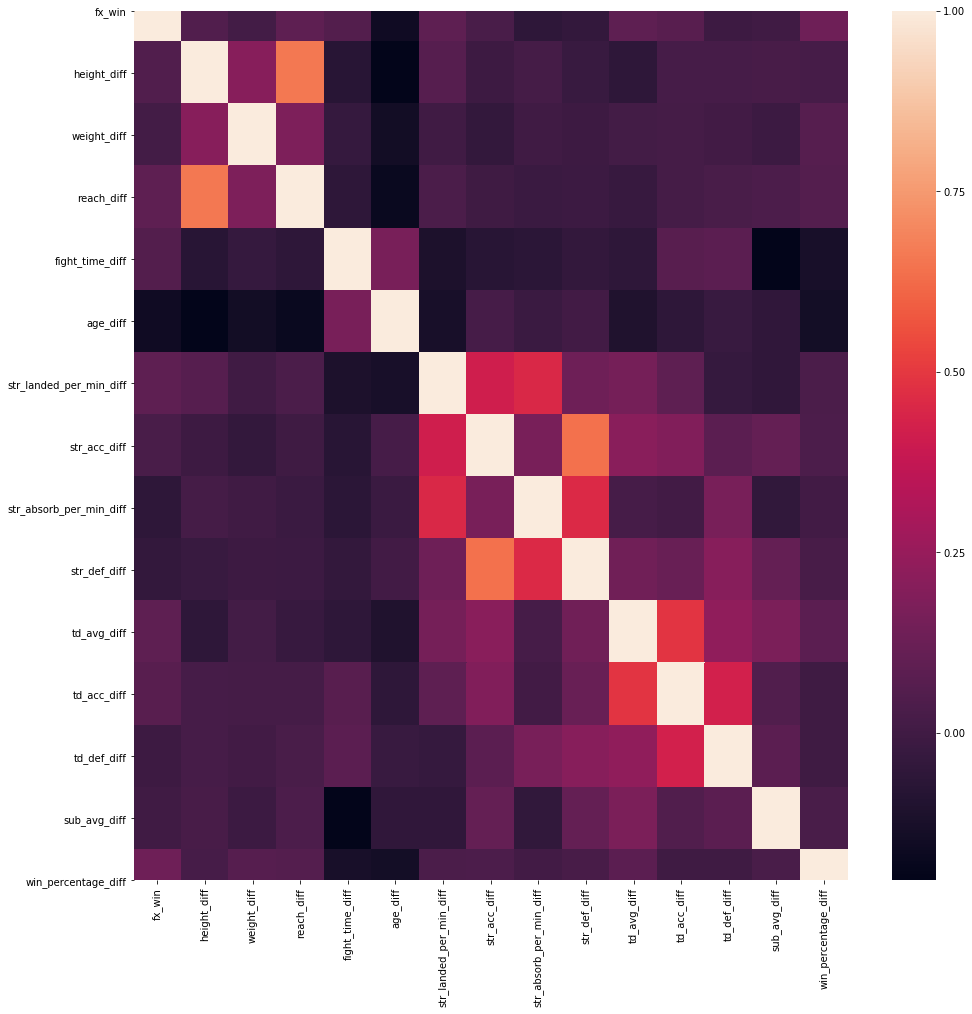

In [109]:
plt.figure(figsize=(16,16))
sns.heatmap(cor_mat, annot=False)
plt.show()

In [110]:
df.to_csv('data_cleaned5.csv', index=False)